# Energy A.I. Hackathon 2021 Workflow - Team Anticline
## Visualizations
#### Authors: Esmail Eltahan, Jeon Jonghyeon, Mehran Mehrabi, and Wen Pan, Hildebrand Department of Petroleum and Geosystems Engineering. 
#### The University of Texas at Austin, Austin, Texas USA 

<img src="anticline_official_logo.png" width=300 />



## Data Visulatization 

Here, we visualize the raw data to inspect and look for any trends

In [339]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
import seaborn as sns       #

## Load the data 



In [340]:
ai = np.load("2d_ai.npy")
sand_propotion = np.load("2d_sand_propotion.npy")
sandy_shale_propotion = np.load("2d_sandy_shale_propotion.npy")
shale_propotion = np.load("2d_shale_propotion.npy")
shaly_sand_propotion = np.load("2d_shaly_sand_propotion.npy")
top_depth = np.load("2d_top_depth.npy")
df_production = pd.read_csv('production_history.csv')
df_p = pd.read_csv('./preprocessed_data/df_p_preprocessed_{0:03d}.csv'.format(0))
df_n = pd.read_csv('./preprocessed_data/df_n_preprocessed_{0:03d}.csv'.format(0))
df_merged = pd.read_csv('./preprocessed_data/df_merged_{0:03d}.csv'.format(0))

woc_rise_1 = np.load("./engineered_maps/woc_rise_1.npy")
woc_rise_2 = np.load("./engineered_maps/woc_rise_2.npy")
woc_rise_3 = np.load("./engineered_maps/woc_rise_3.npy")
dp_1 = np.load("./engineered_maps/dp_1.npy")
dp_2 = np.load("./engineered_maps/dp_2.npy")
dp_3 = np.load("./engineered_maps/dp_3.npy")
df_merged.columns

Index(['Well_ID', 'X', 'Y', 'Depth', 'Porosity', 'Perm', 'AI', 'Density',
       'Comp_vel', 'E', 'Vs', 'G', 'layer', 'lith_id', 'Log_perm', 'mindist',
       'avg_inv_dist', 'avg_sq_inv_dist', 'avg_sqrt_inv_dist', 'log_mindist',
       'Top_depth', 'interval', 'distance to woc', 'location',
       'distance to fault', 'fault indicator', 'Avg_perm', 'thickness',
       'bottom to woc', 'sand prp.', 'sandshaly prp.', 'k/log_mindist',
       'area_poly', 'woc rise 0', 'woc rise 1', 'woc rise 2', 'woc rise 3',
       'bottom to woc 1', 'bottom to woc 2', 'bottom to woc 3', 'Cumoil1',
       'Cumoil2', 'Cumoil3', 'Cumwater1', 'Cumwater2', 'Cumwater3', 'total1',
       'total2', 'total3', 'prod_o1', 'prod_o2', 'prod_o3', 'prod_w1',
       'prod_w2', 'prod_w3', 'oil12', 'oil23', 'water12', 'water23', 'wcut1',
       'wcut2', 'wcut3', 'wcutincrease1', 'wcutincrease2', 'dp_1', 'dp_2',
       'dp_3'],
      dtype='object')

## First, let's plot the maps we have given

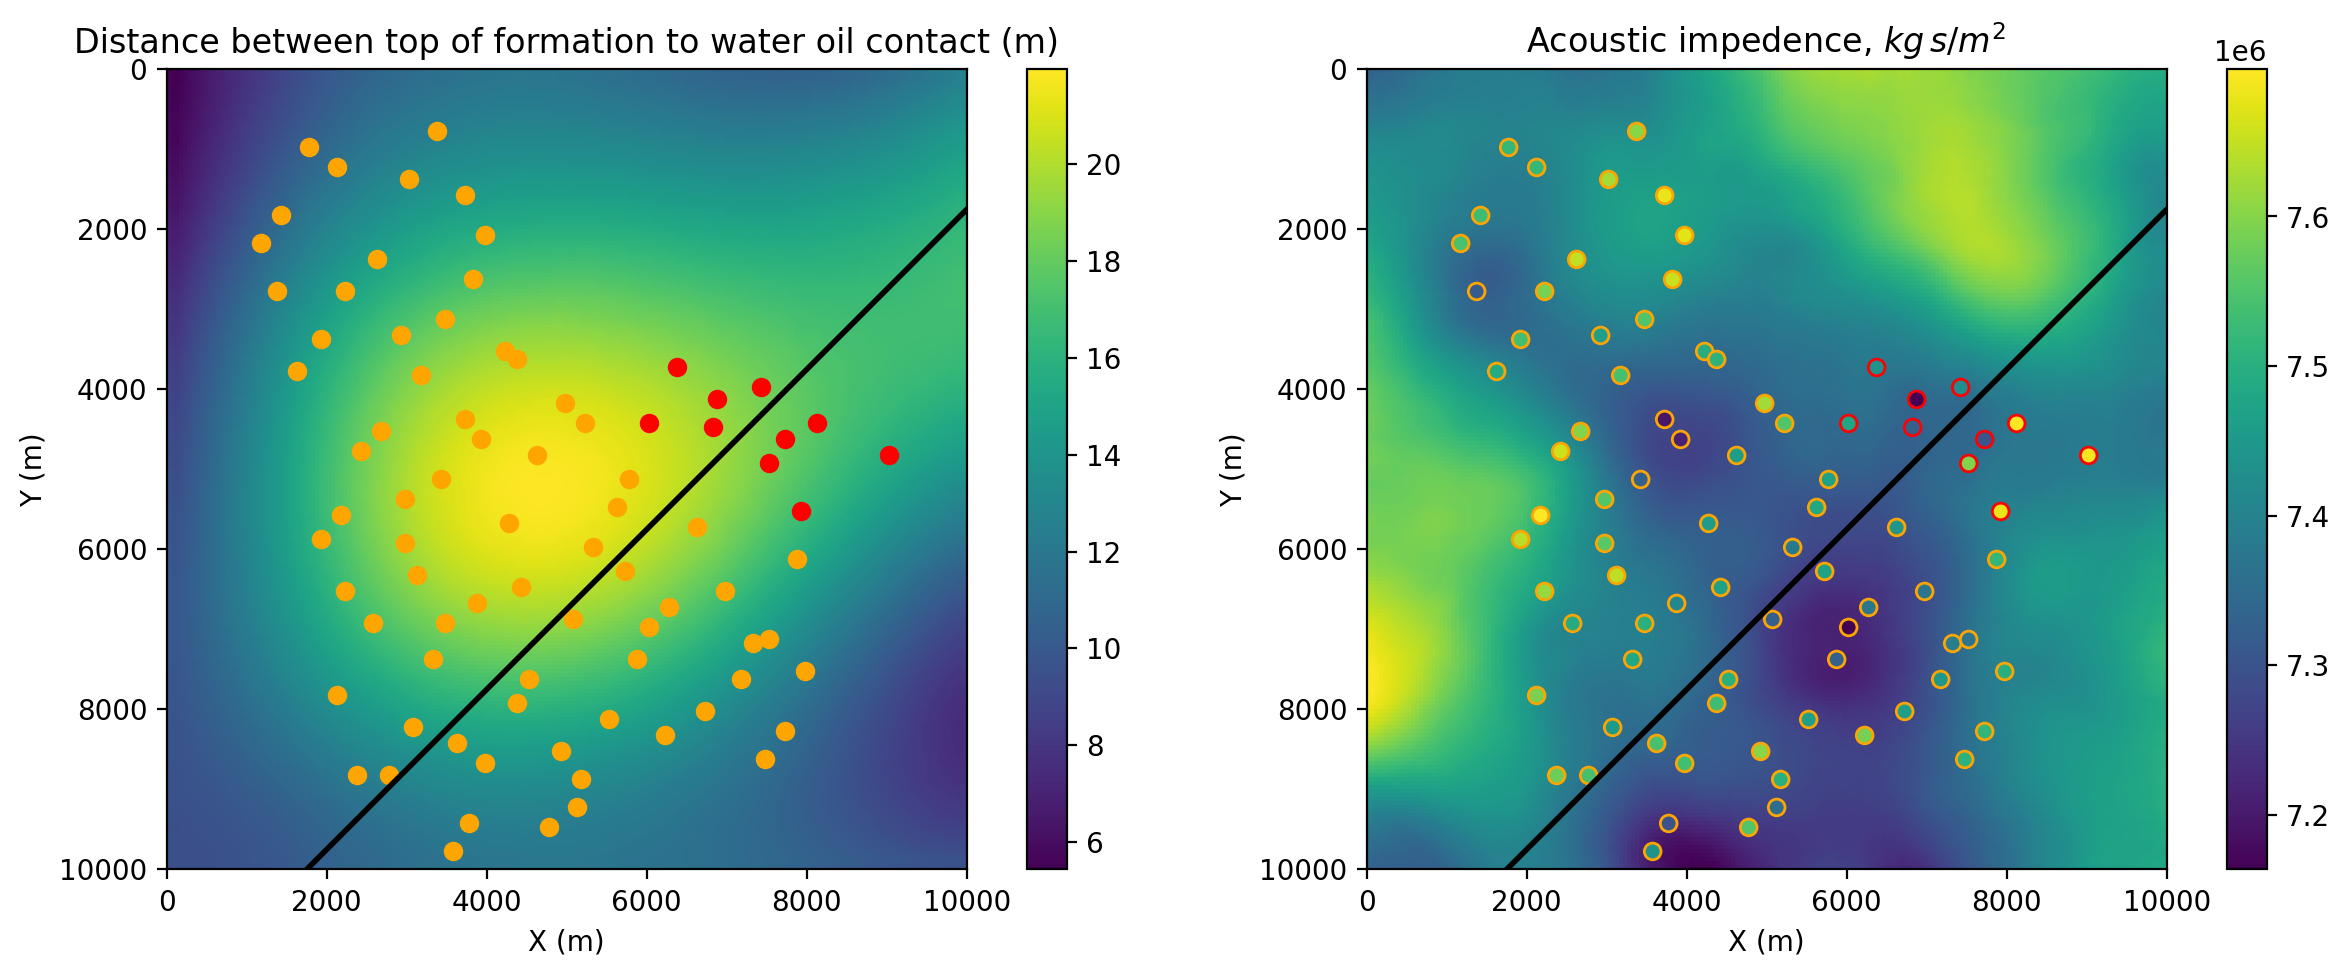

In [341]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)
plt.figure(dpi=200)

plt.subplot(121)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_producers_average["X"], df_producers_average["Y"], color = 'orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Distance between top of formation to water oil contact (m)")
plt.imshow(distance_to_woc, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(122)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"], c = df_nonproducers_average["AI"], edgecolor = 'red')
plt.scatter(df_producers_average["X"], df_producers_average["Y"], c = df_producers_average["AI"], edgecolor = 'orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)") 
plt.title(r"Acoustic impedence, $kg\, s/m^2$")
plt.imshow(ai, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0)

plt.show()



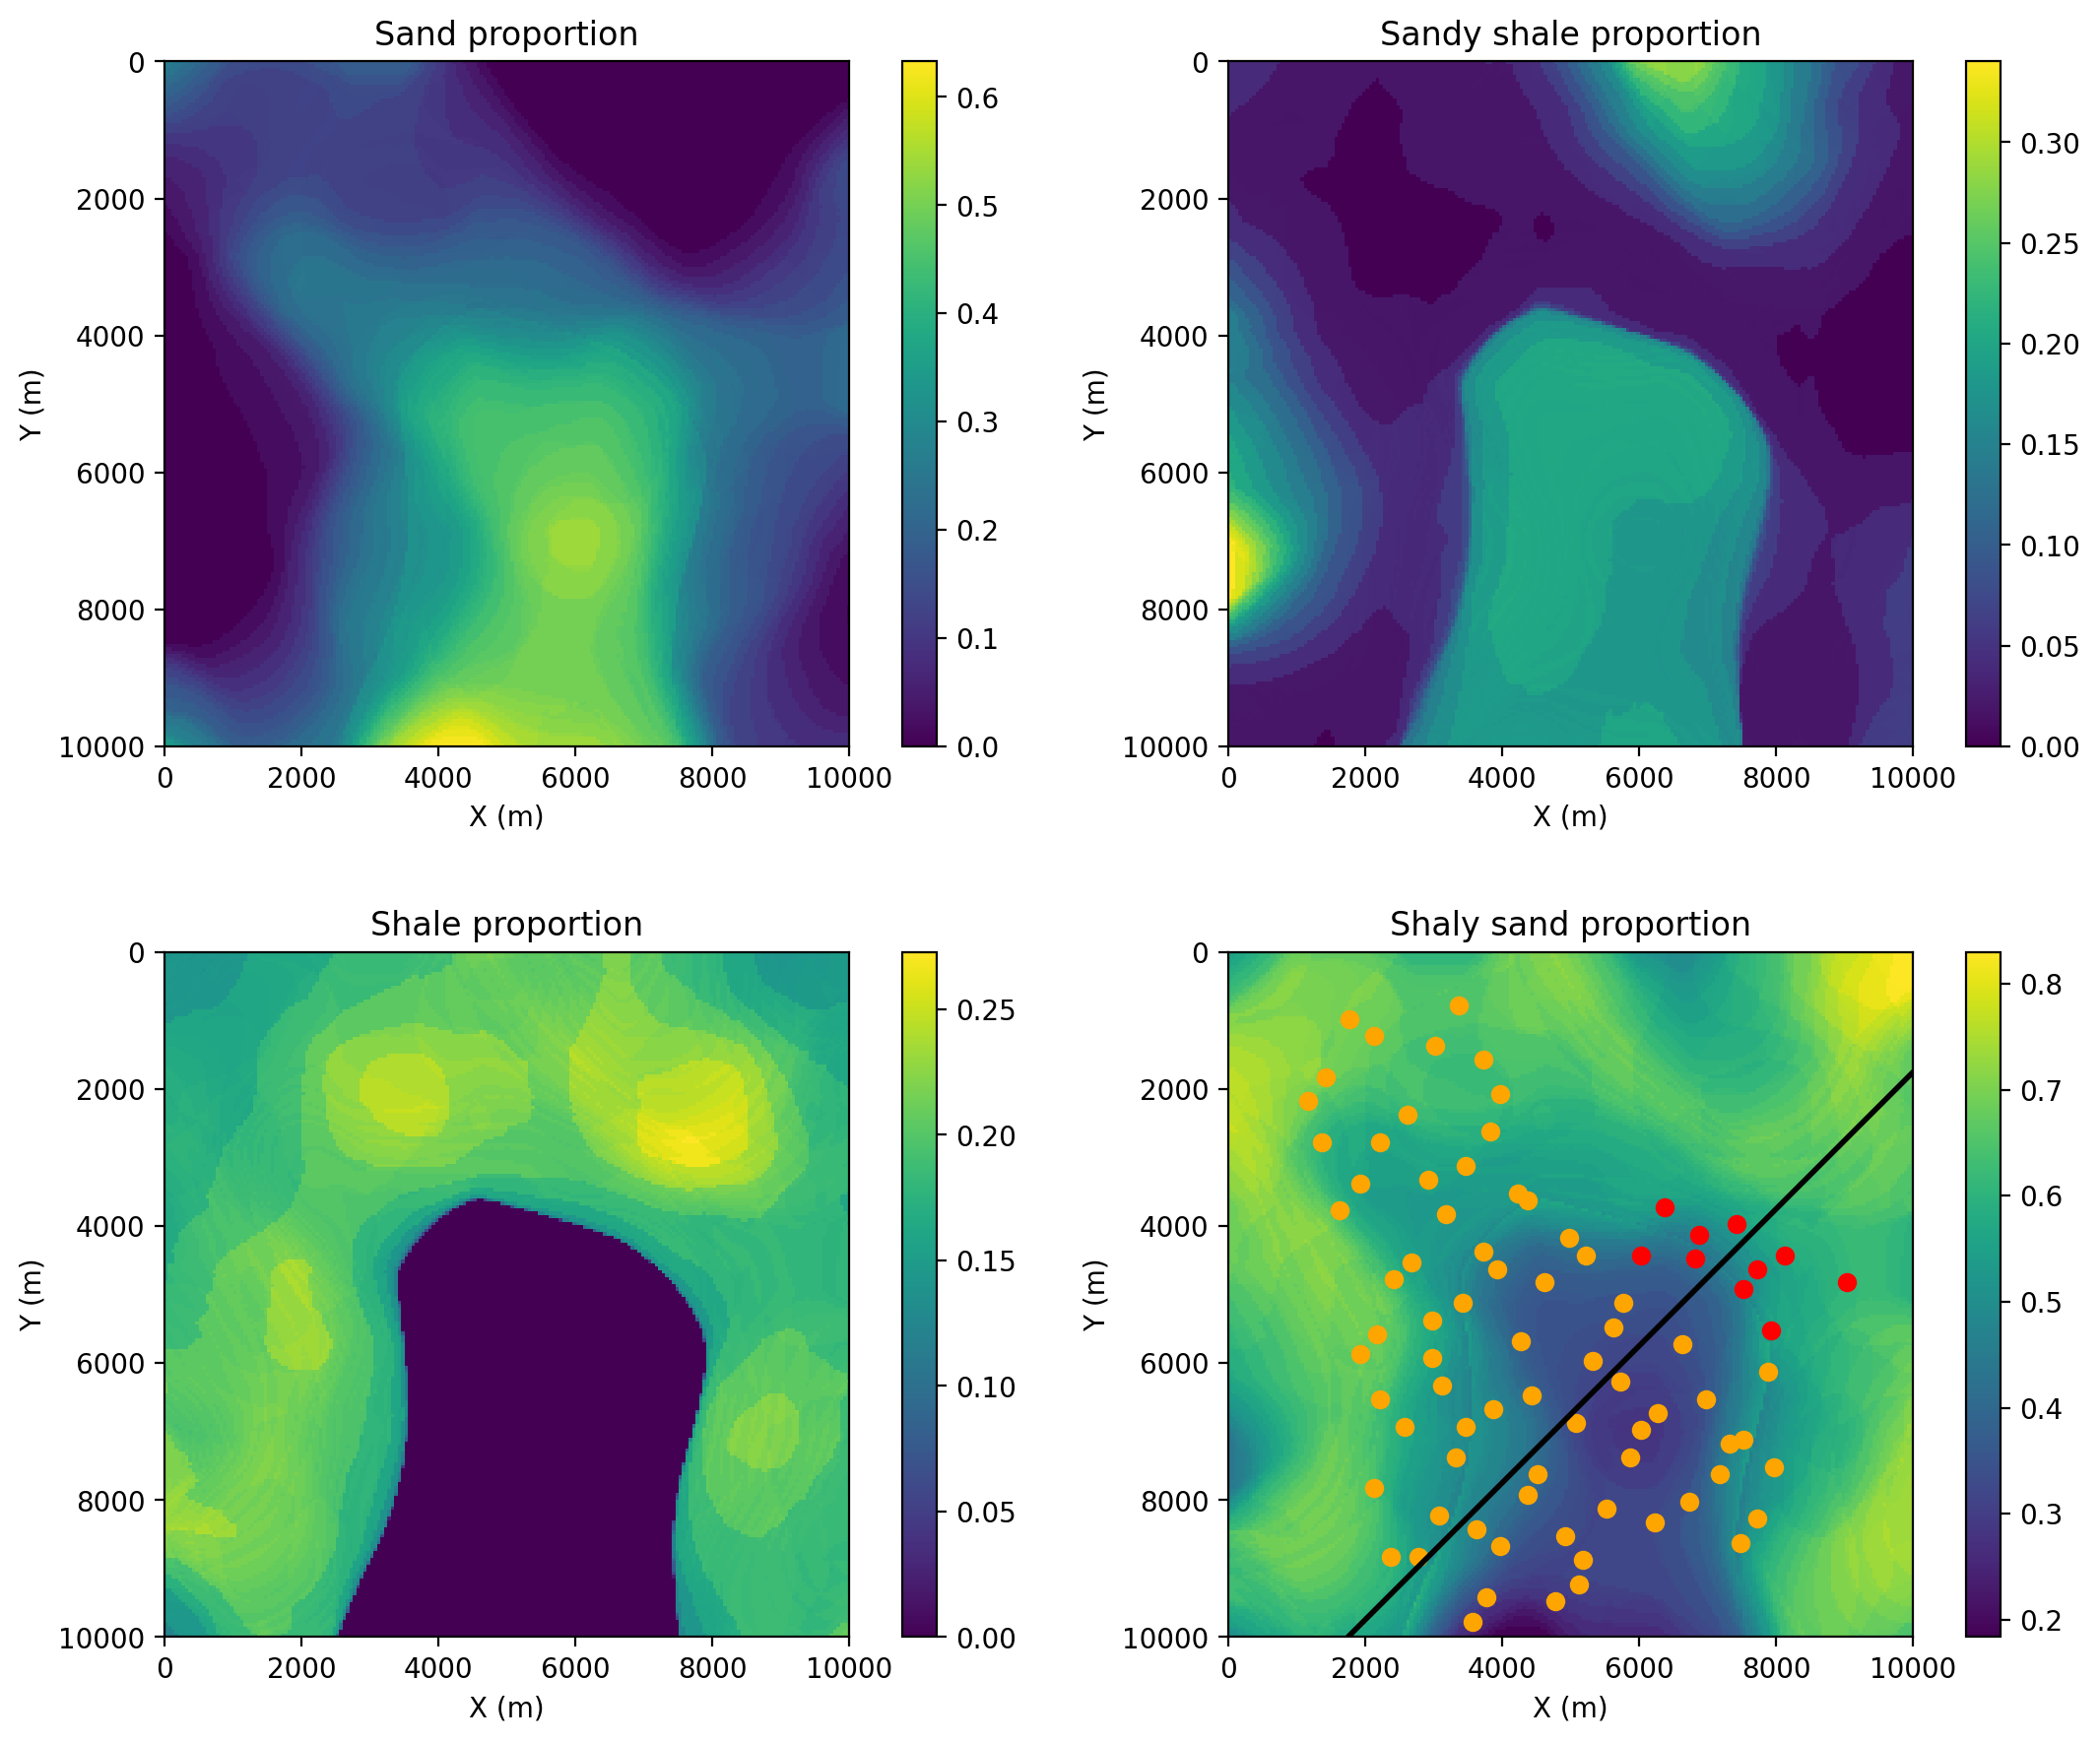

In [342]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)
rank = np.argsort(df_merged["Cumoil1"])
plt.figure(dpi=200)
plt.subplot(221)
# plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"], c = df_nonproducers_average["sand prp."], edgecolor = 'red')
# plt.scatter(df_merged["X"], df_merged["Y"], c = df_merged["sand prp."], s= rank, edgecolor = 'orange')
# plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Sand proportion")
plt.imshow(sand_propotion, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
# plt.scatter(df_n["X"], df_n["Y"], color='r')
# plt.scatter(df_p["X"],df_p["Y"], color = 'orange')
# plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Sandy shale proportion")
plt.imshow(sandy_shale_propotion, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(223)
# plt.scatter(df_n["X"], df_n["Y"], color='r')
# plt.scatter(df_p["X"], df_p["Y"], color = 'orange')
# plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Shale proportion")
plt.imshow(shale_propotion, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(224)
plt.scatter(df_n["X"], df_n["Y"], color='r')
plt.scatter(df_p["X"], df_p["Y"], color = 'orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Shaly sand proportion")
plt.imshow(shaly_sand_propotion, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

## Series of plots to investigate correlation

### Pressure drop and oil production

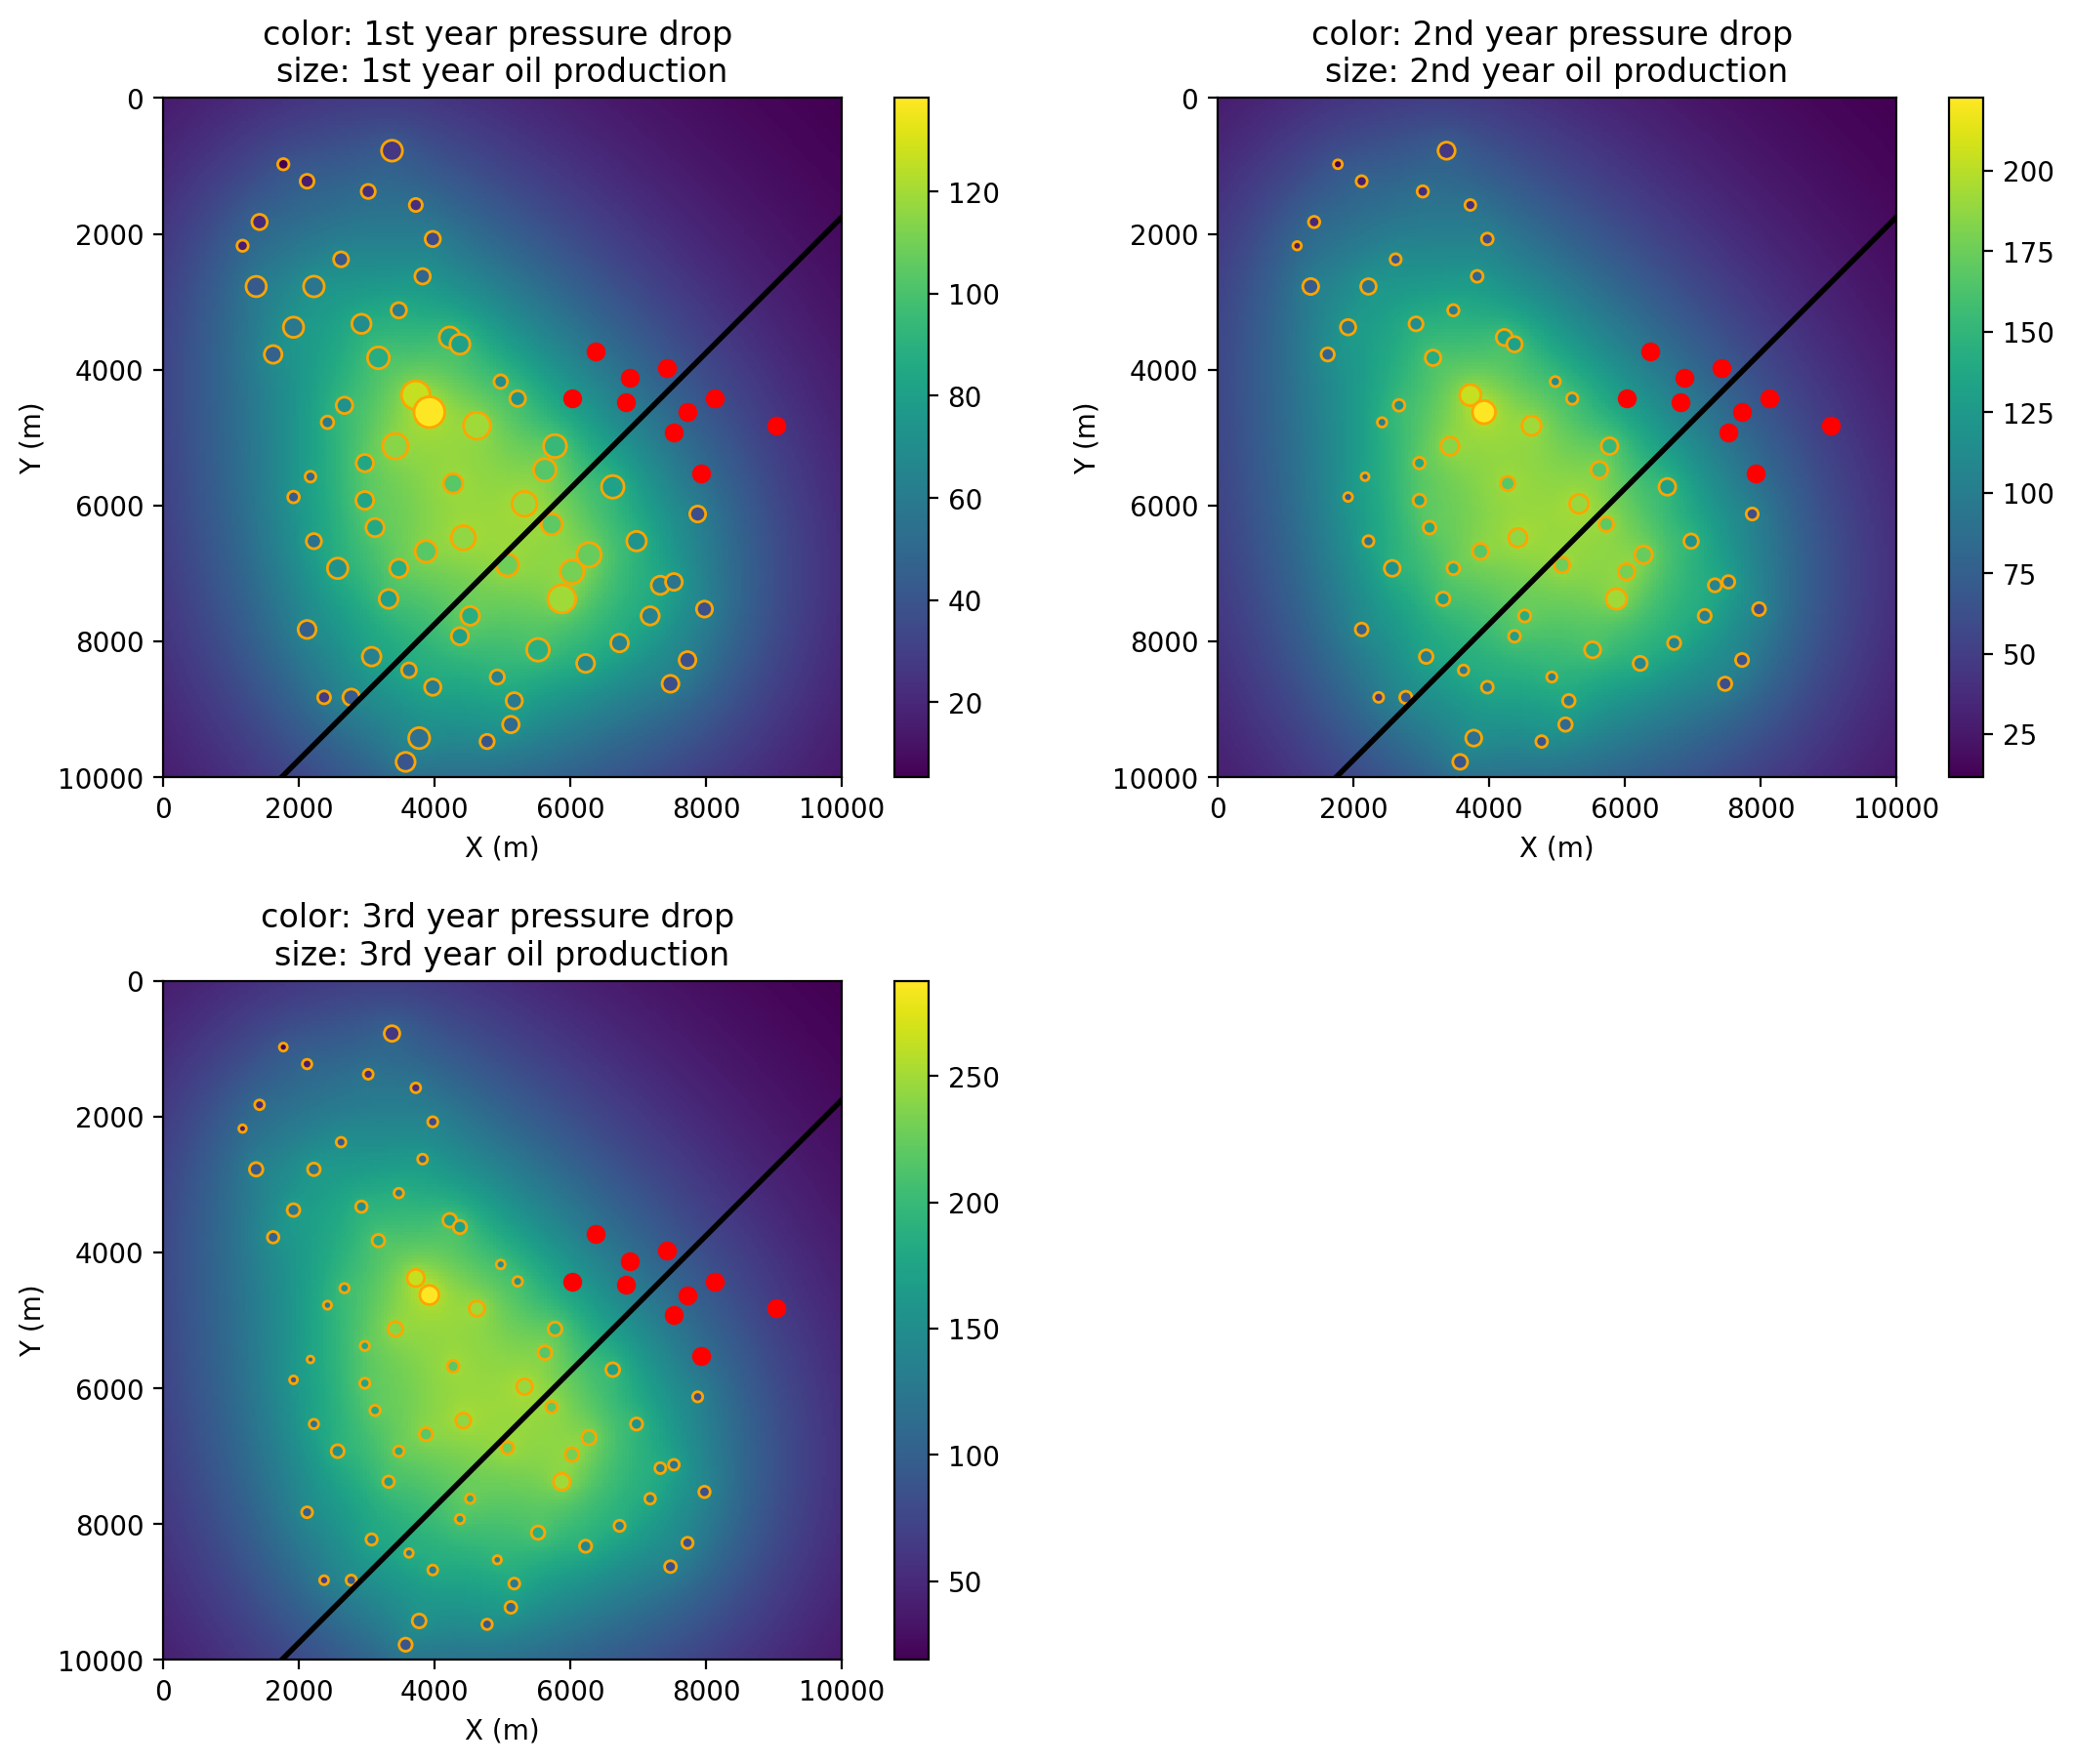

In [343]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)

plt.figure(dpi=200)
plt.subplot(221)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["Cumoil1"]/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 1st year pressure drop \nsize: 1st year oil production")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()))
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_2"], s = (df_merged["Cumoil2"]- df_merged["Cumoil1"])/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 2nd year pressure drop \nsize: 2nd year oil production")
plt.imshow(dp_2, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(223)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_3"], s = (df_merged["Cumoil3"]- df_merged["Cumoil2"])/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 3rd year pressure drop \nsize: 3rd year oil production")
plt.imshow(dp_3, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

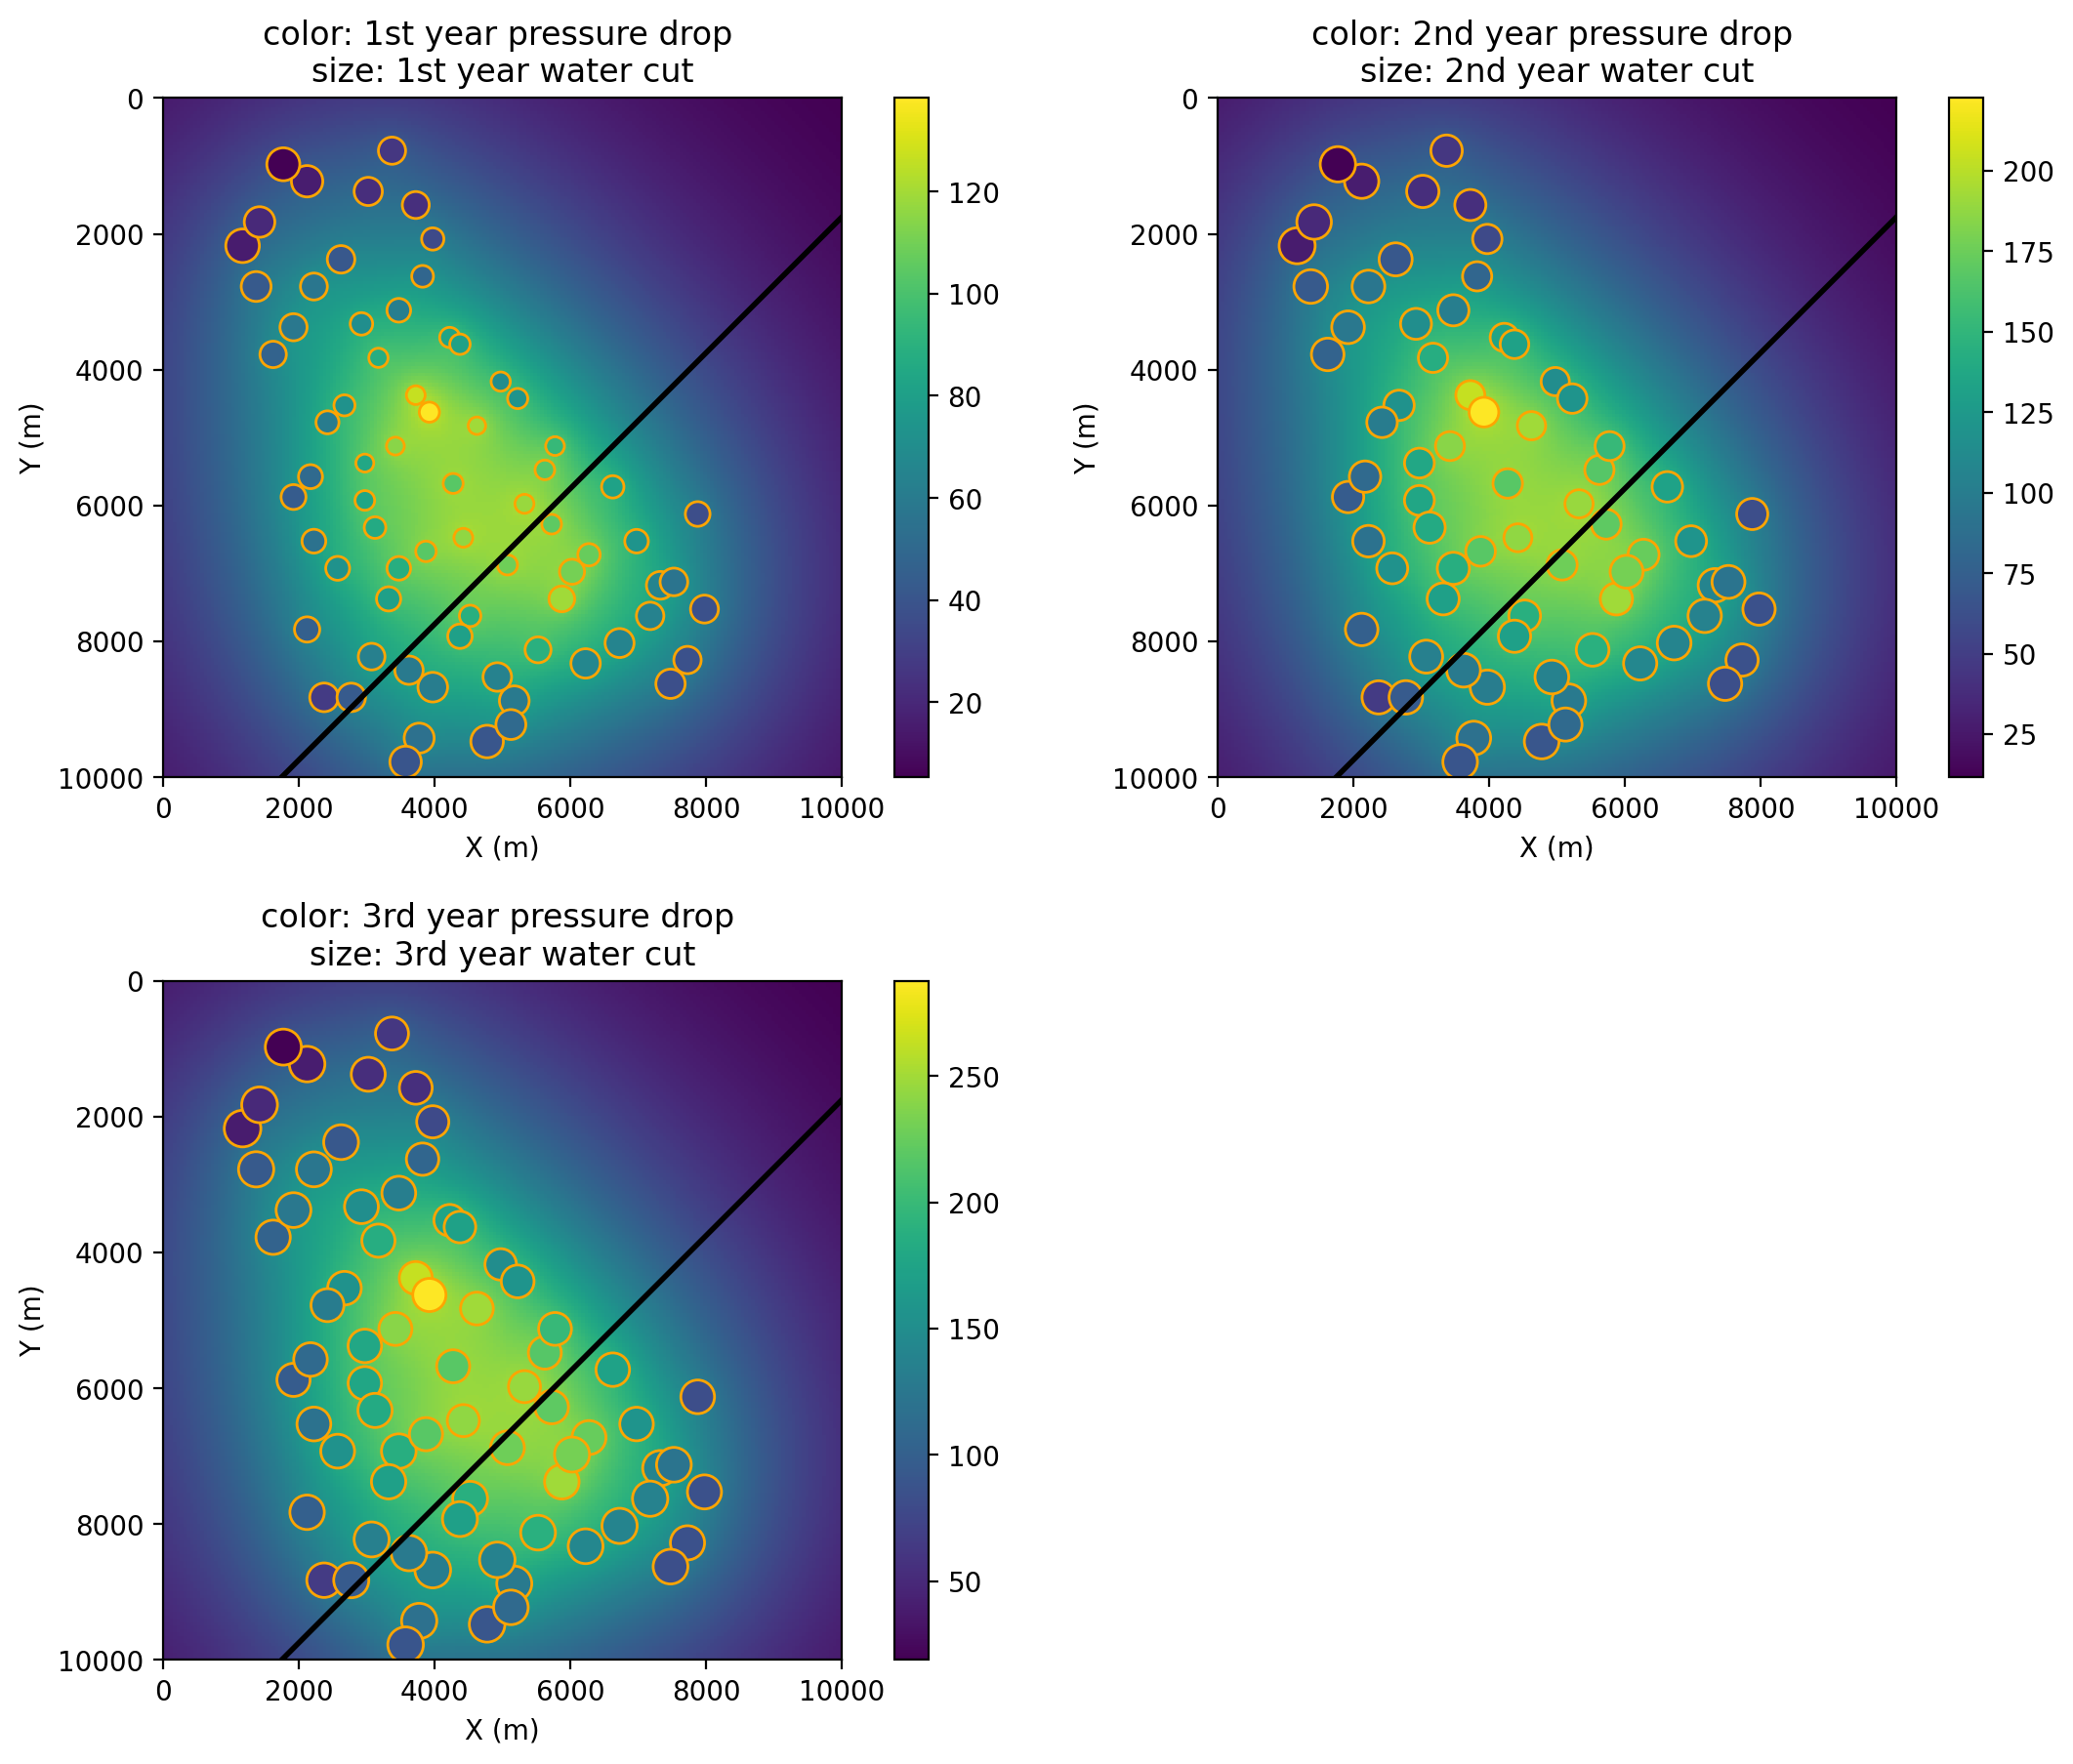

In [344]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)

plt.figure(dpi=200)
plt.subplot(221)
# plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["wcut1"]*200, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 1st year pressure drop \nsize: 1st year water cut")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()))
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
# plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["wcut2"]*200, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 2nd year pressure drop \nsize: 2nd year water cut")
plt.imshow(dp_2, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(223)
# plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["wcut3"]*200, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 3rd year pressure drop \nsize: 3rd year water cut")
plt.imshow(dp_3, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

### Pressure drop and first year total production

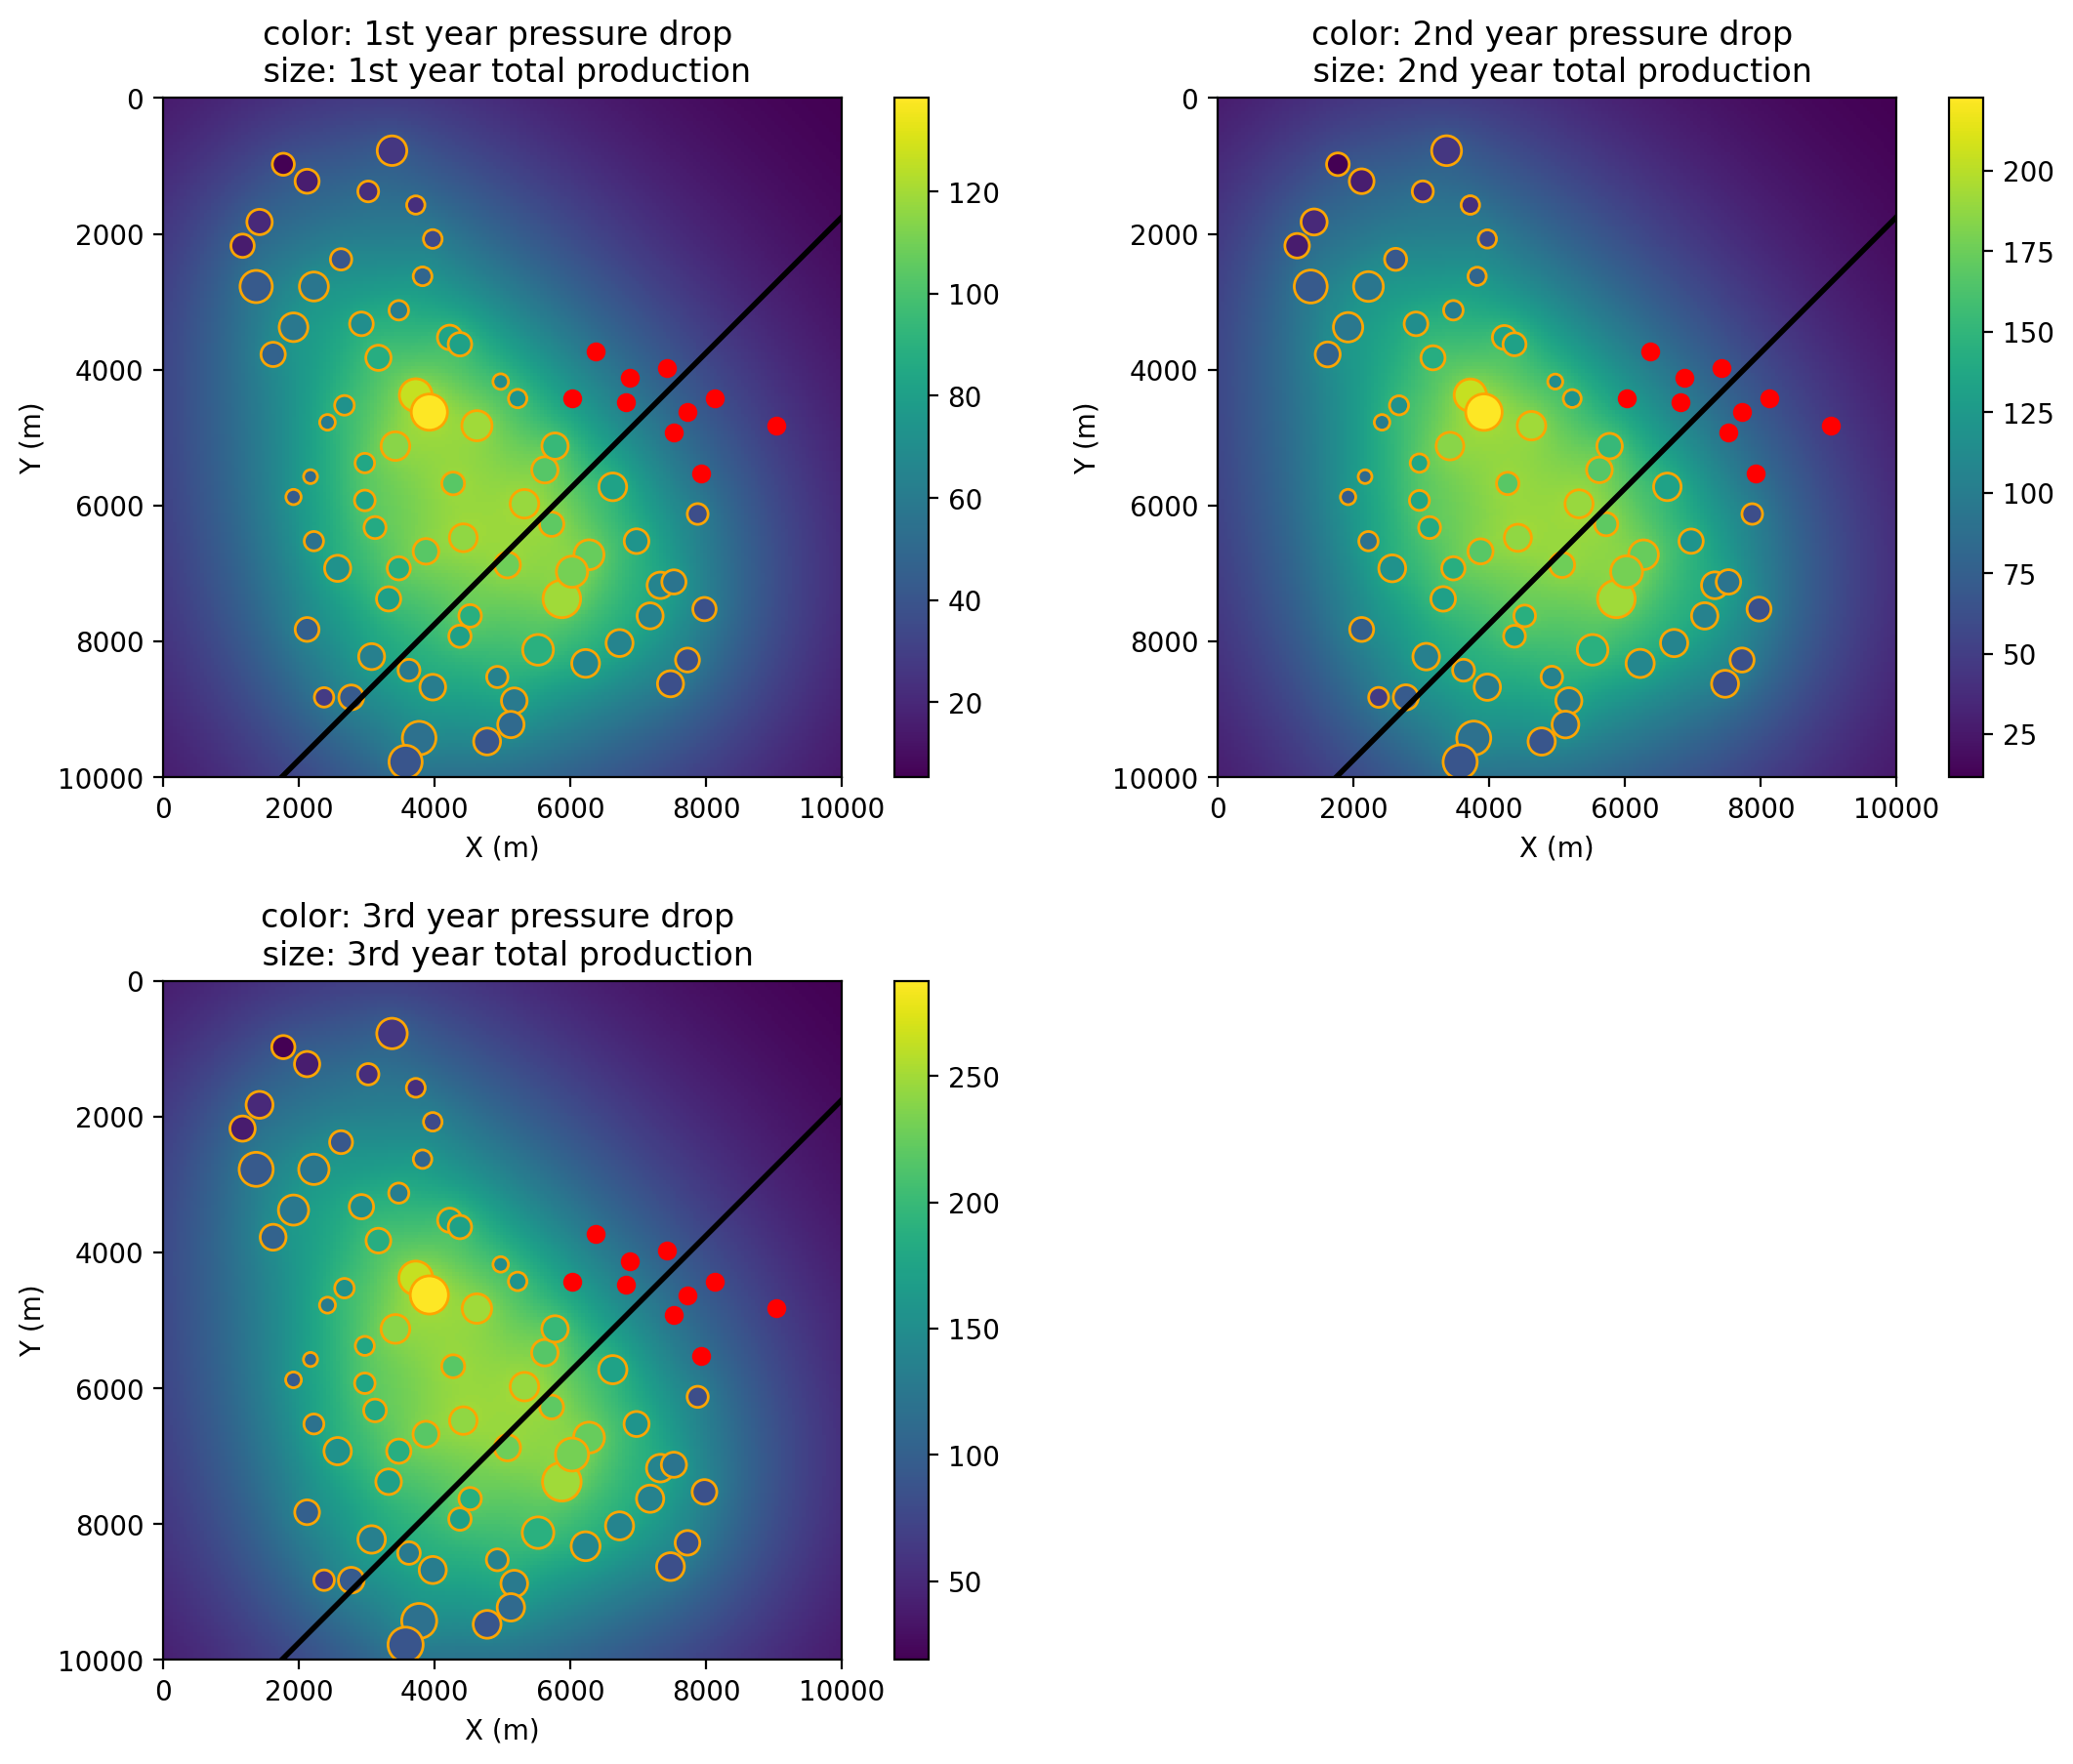

In [345]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)

plt.figure(dpi=200)
plt.subplot(221)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["total1"]/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 1st year pressure drop \n size: 1st year total production")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()))
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_2"], s = (df_merged["total2"]- df_merged["total1"])/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 2nd year pressure drop \n size: 2nd year total production")
plt.imshow(dp_2, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(223)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_3"], s = (df_merged["total3"]- df_merged["total2"])/10, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 3rd year pressure drop \n size: 3rd year total production")
plt.imshow(dp_3, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

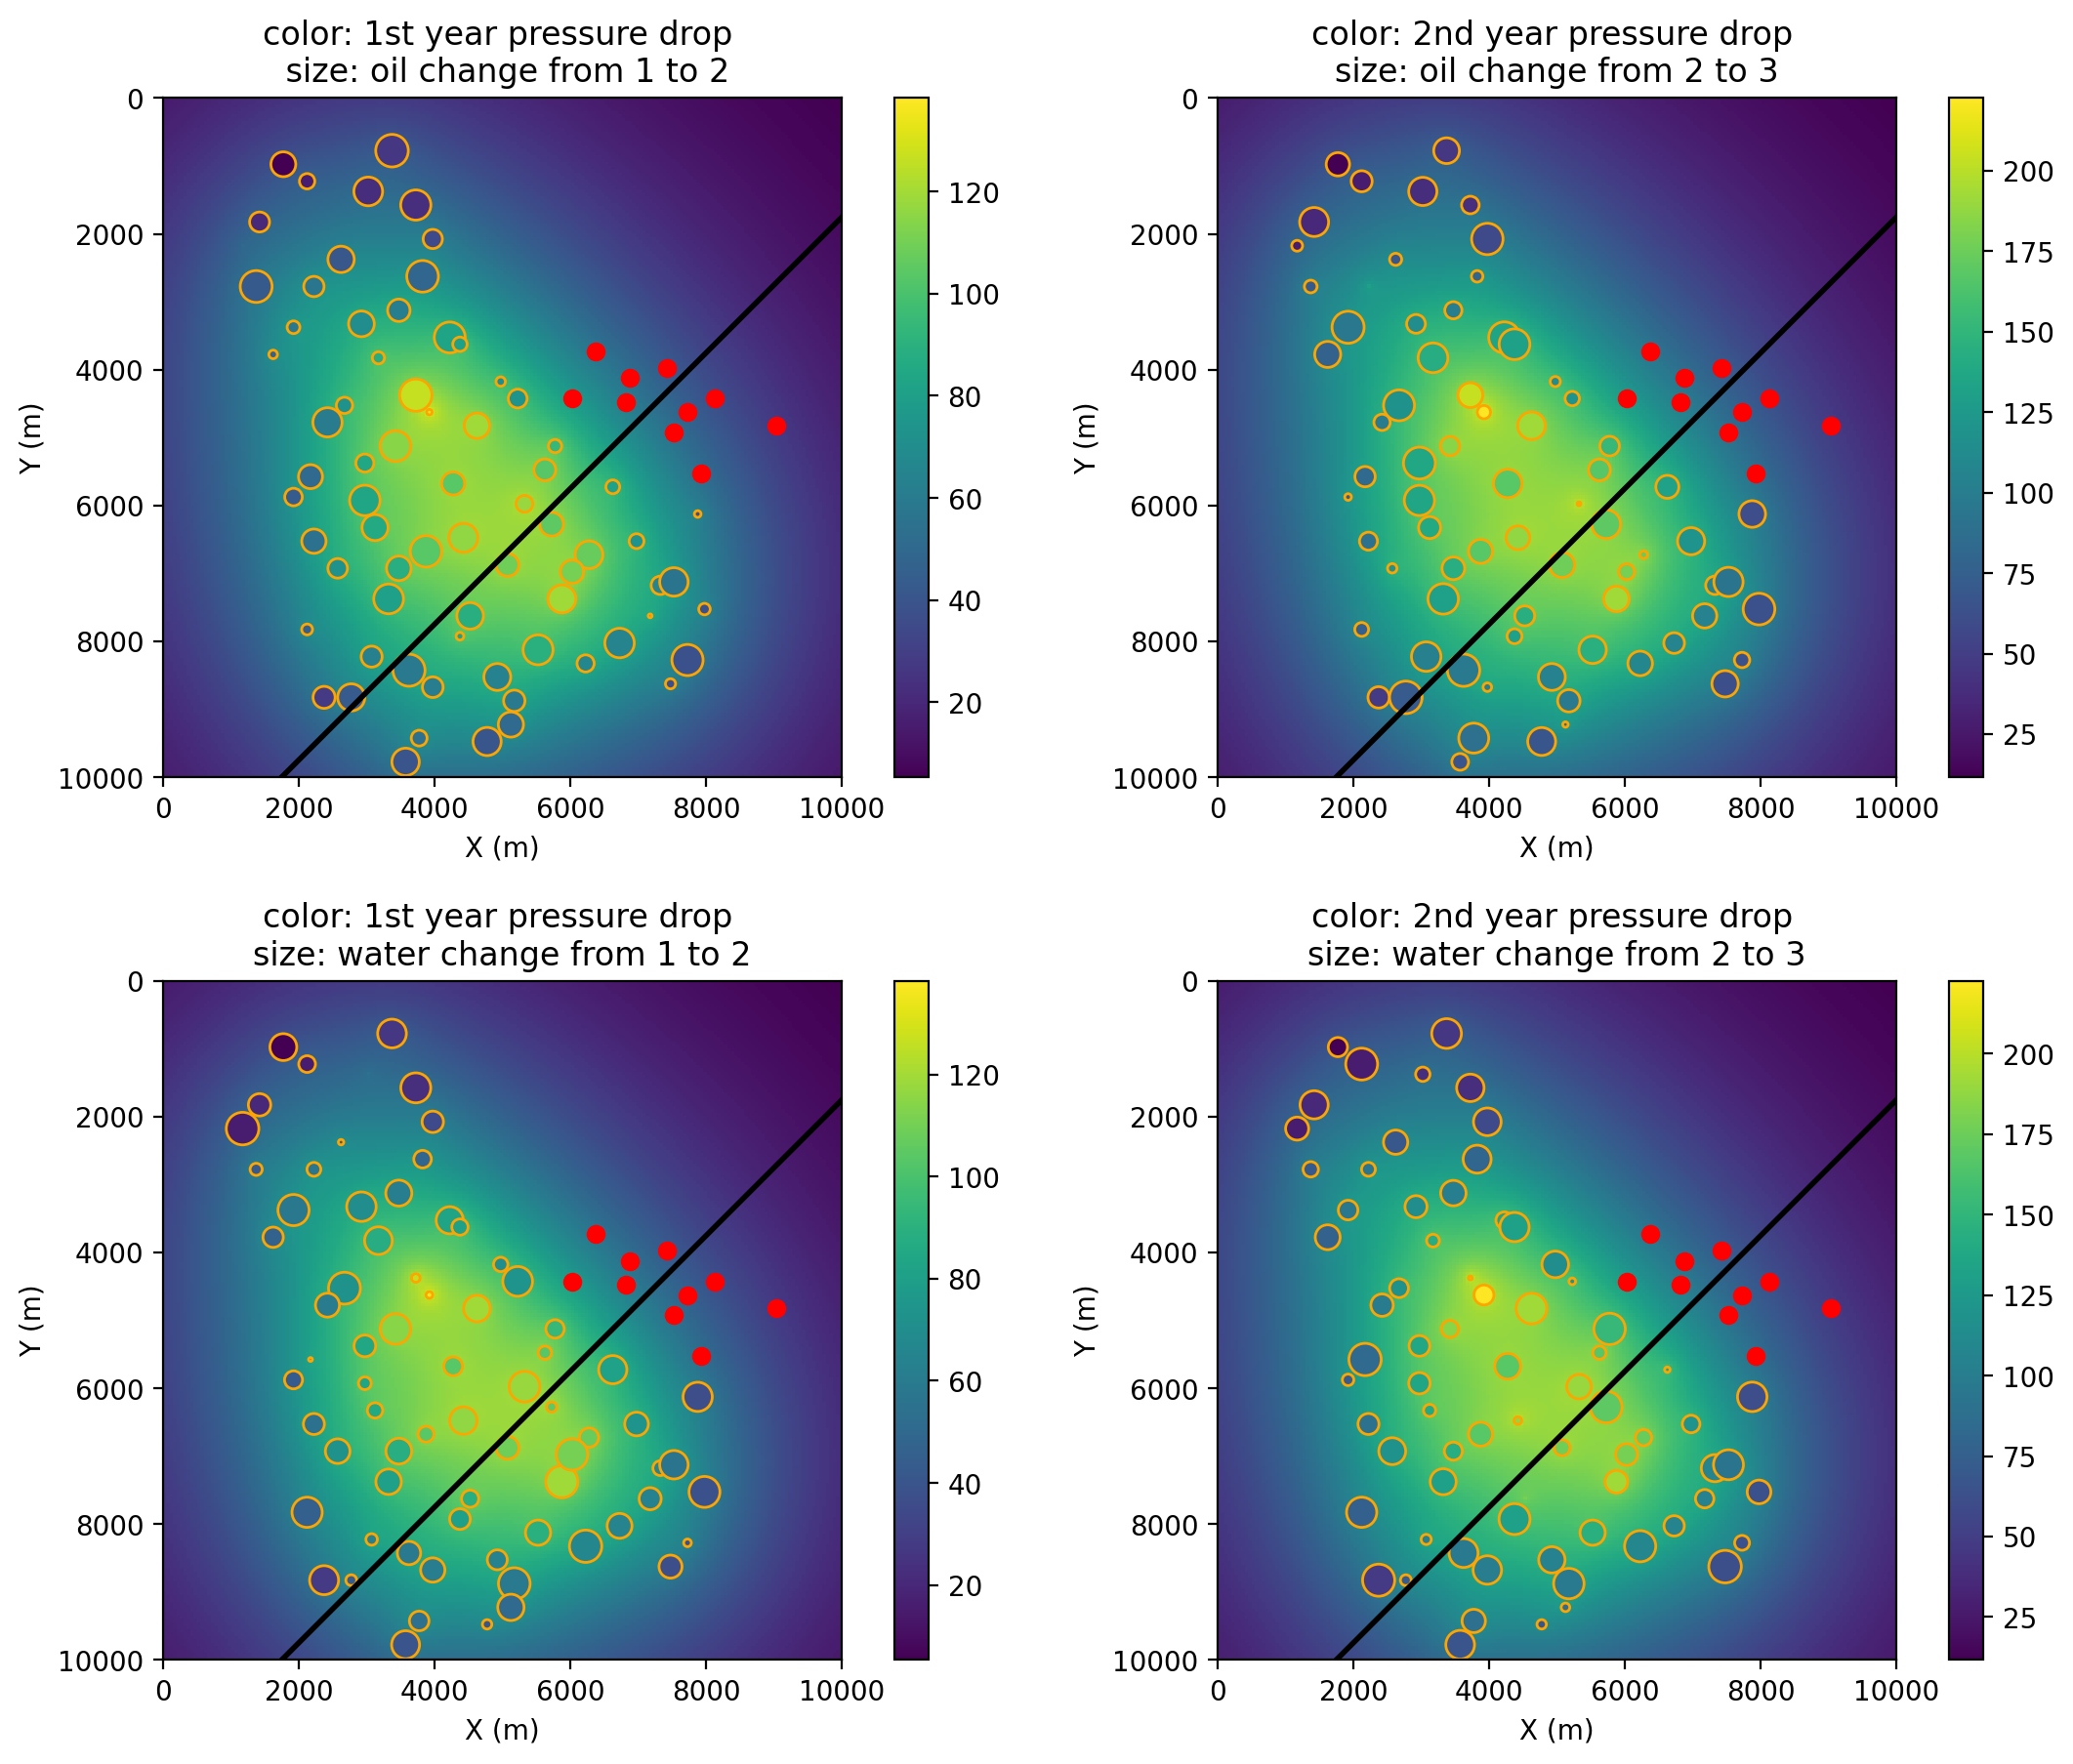

In [346]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)

oil_r_12 = np.argsort(df_merged["oil12"])*2
oil_r_23 = np.argsort(df_merged["oil23"])*2
water_r_12 = np.argsort(df_merged["water12"])*2
water_r_23 = np.argsort(df_merged["water23"])*2
plt.figure(dpi=200)
plt.subplot(221)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = oil_r_12, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 1st year pressure drop \n size: oil change from 1 to 2")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()))
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_2"], s = oil_r_23, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 2nd year pressure drop \nsize: oil change from 2 to 3")
plt.imshow(dp_2, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(223)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = water_r_12, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 1st year pressure drop \nsize: water change from 1 to 2")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(224)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_2"], s = water_r_23, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("color: 2nd year pressure drop \nsize: water change from 2 to 3")
plt.imshow(dp_2, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

### Pressure drop and porosity rank

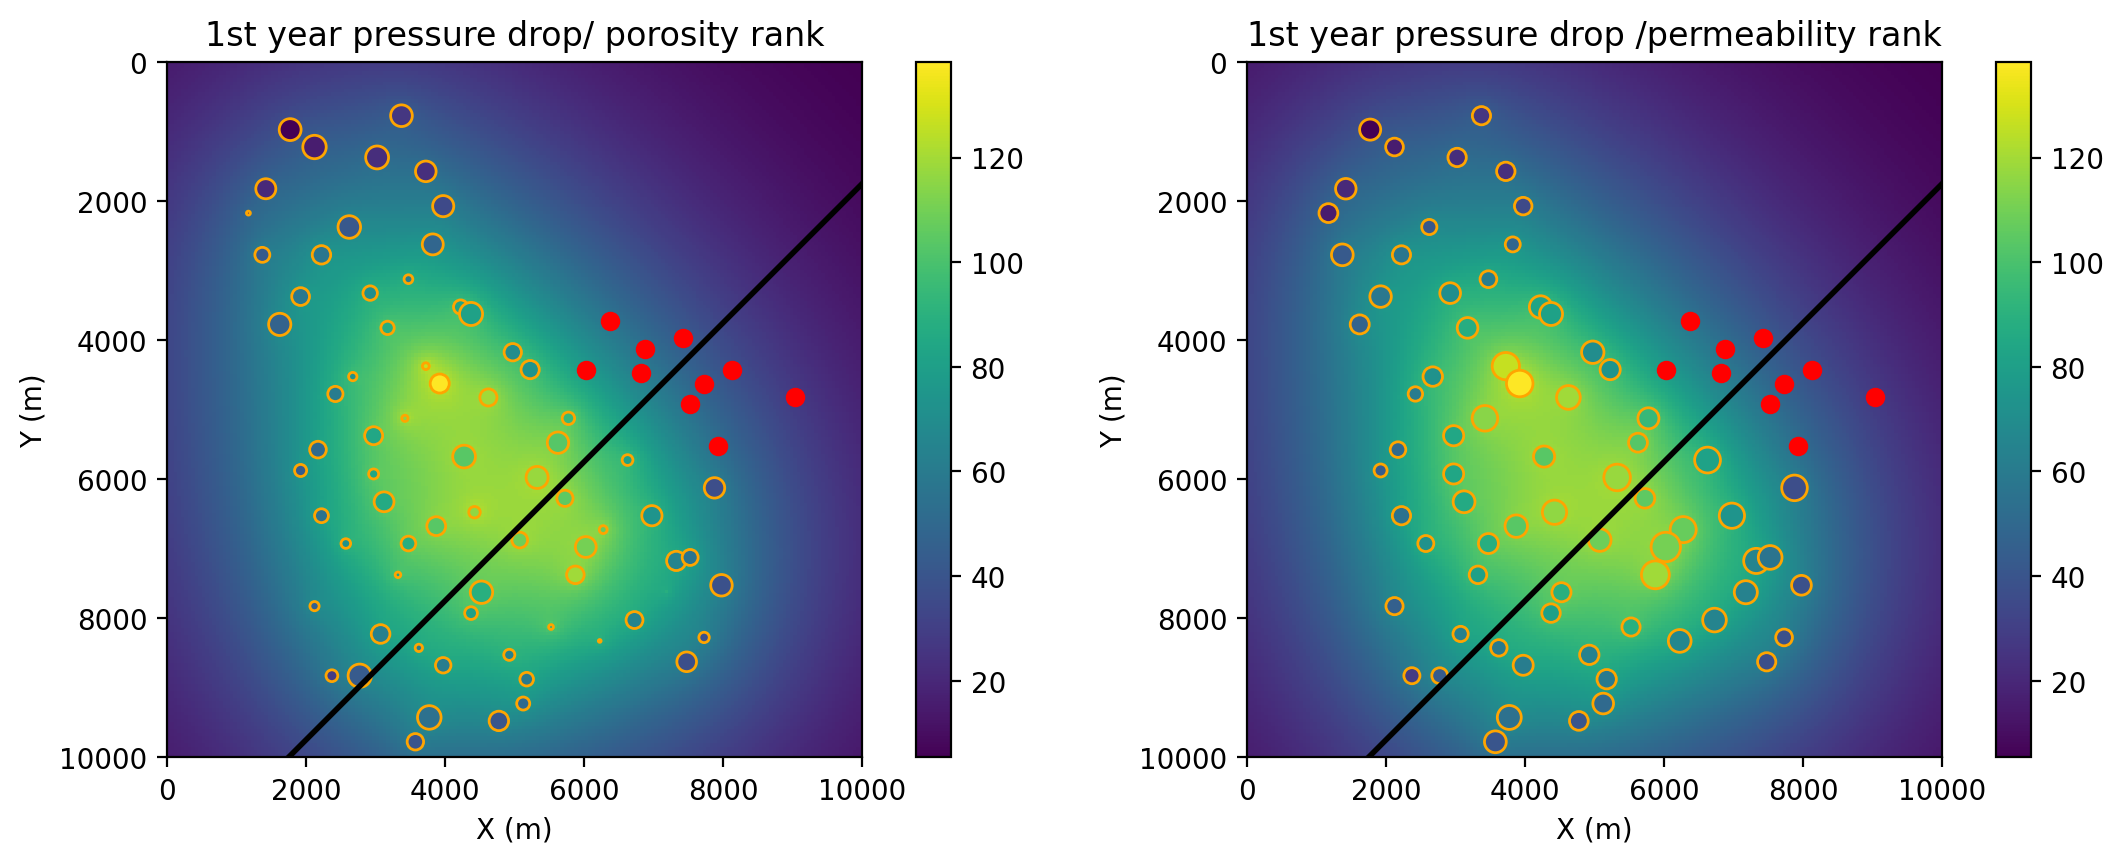

In [347]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)
plt.figure(dpi=200)
plt.subplot(221)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
porrank = np.argsort(df_merged["Porosity"])
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = porrank, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("1st year pressure drop/ porosity rank")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplot(222)
plt.scatter(df_nonproducers_average["X"], df_nonproducers_average["Y"],  color='r')
porrank = np.argsort(df_merged["Avg_perm"])
plt.scatter(df_merged["X"], df_merged["Y"],  c = df_merged["dp_1"], s = df_merged["Avg_perm"]/2, edgecolor ='orange')
plt.plot(x, fault, color = 'k', linewidth ='2')

plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("1st year pressure drop /permeability rank")
plt.imshow(dp_1, extent=(x.min(), x.max(), y.max(), y.min()),
           )
plt.colorbar()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0., hspace =0.3)

plt.show()

## Investigate data above and under the fault

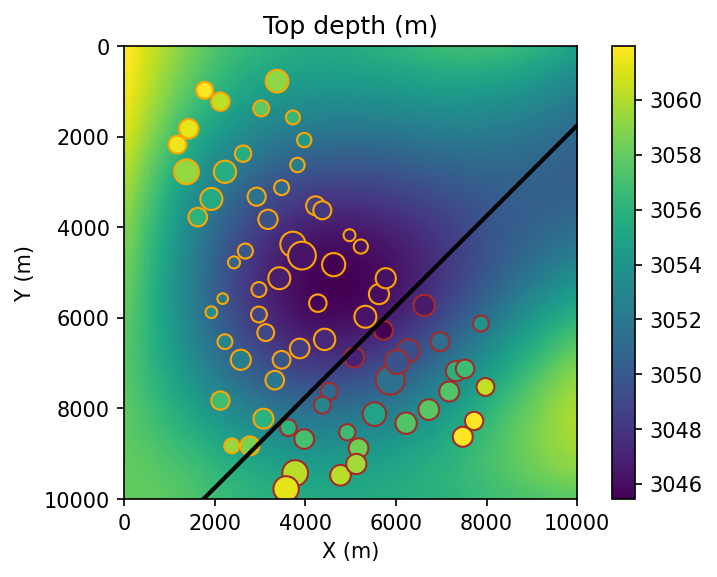

In [352]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)
plt.figure(dpi=150)
plt.scatter(df_above_fault["X"], df_above_fault["Y"],  c = df_above_fault["Depth"],s = df_above_fault["total1"]*0.1, edgecolor ='orange')
plt.scatter(df_below_fault["X"], df_below_fault["Y"],  c = df_below_fault["Depth"],s = df_below_fault["total1"]*0.1, edgecolor ='brown')

plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Top depth (m)")
plt.imshow(top_depth, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

## Series of plots for correlation in volumetrics

The following plots are displayed to inspect any kind of correlations between the response feature and the predictor features. 

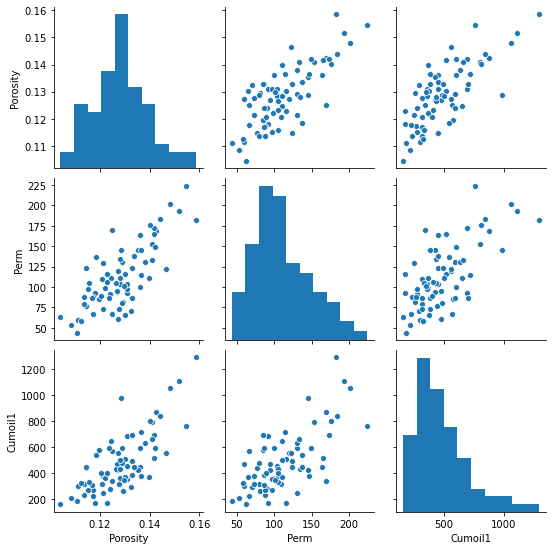

In [362]:
sns.pairplot(df_merged[['Porosity','Perm', 'Cumoil1']])

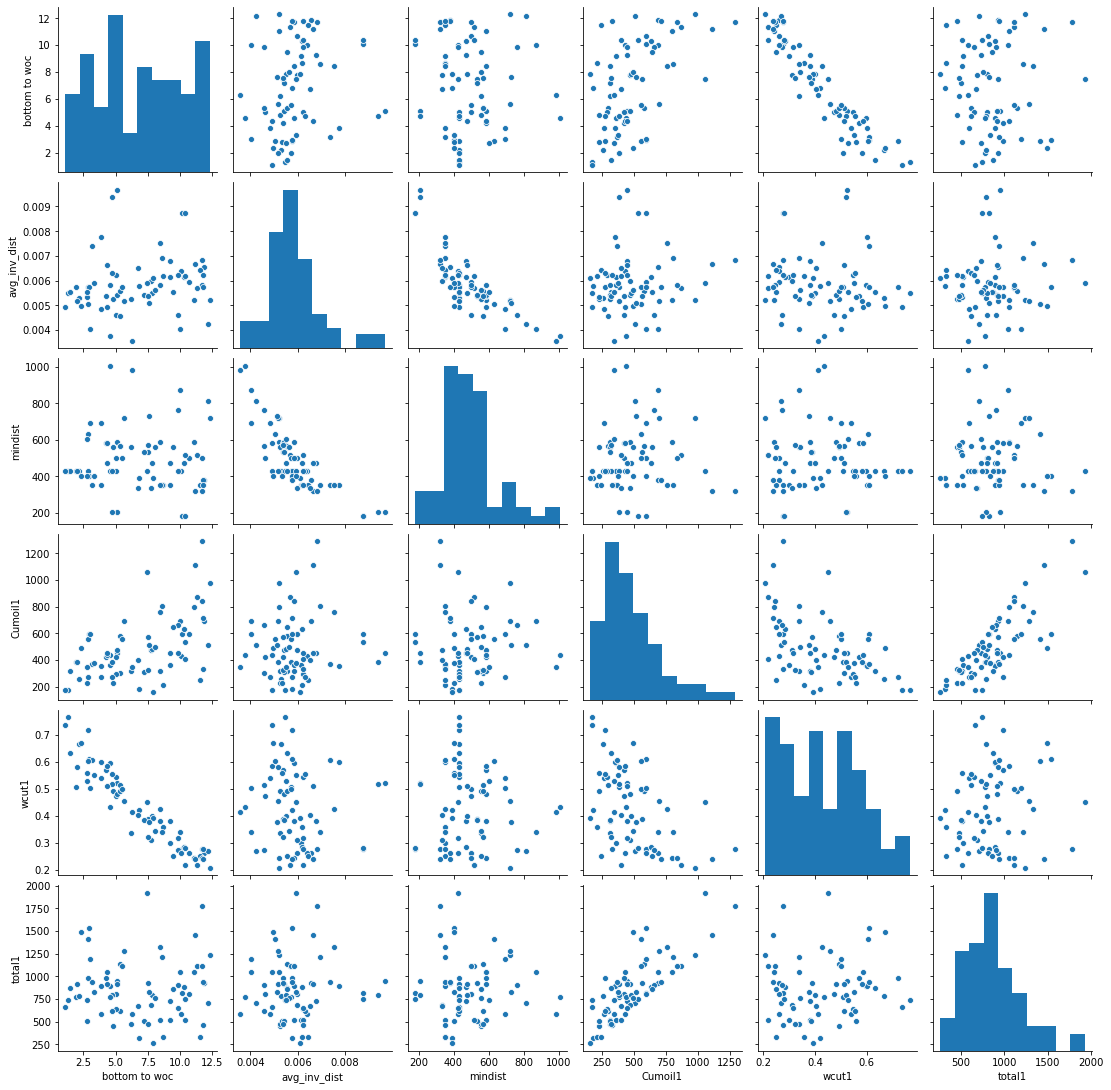

In [354]:
sns.pairplot(df_merged[['bottom to woc','avg_inv_dist', 'mindist', 'Cumoil1', 'wcut1', 'total1']])

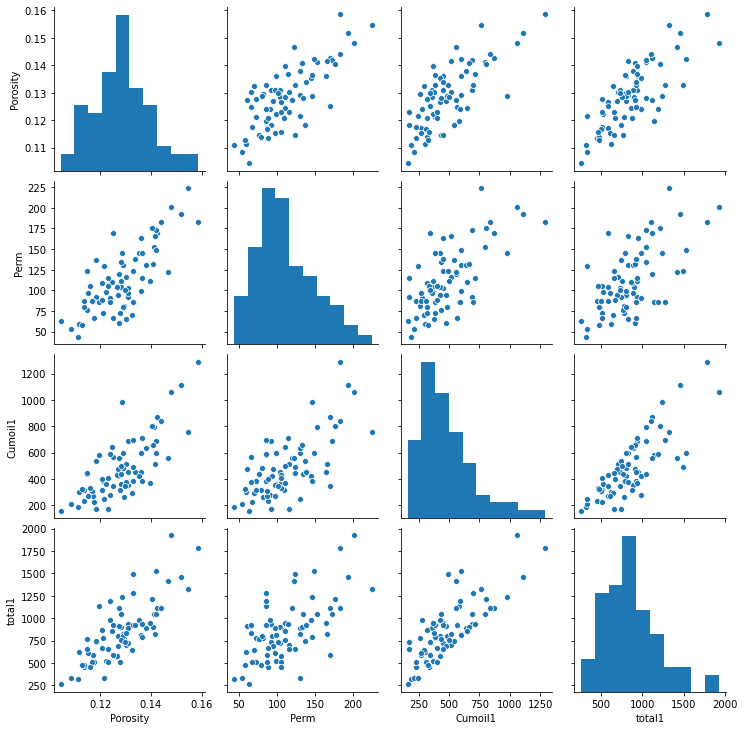

In [363]:
sns.pairplot(df_merged, vars=['Porosity','Perm', 'Cumoil1',  'total1'])

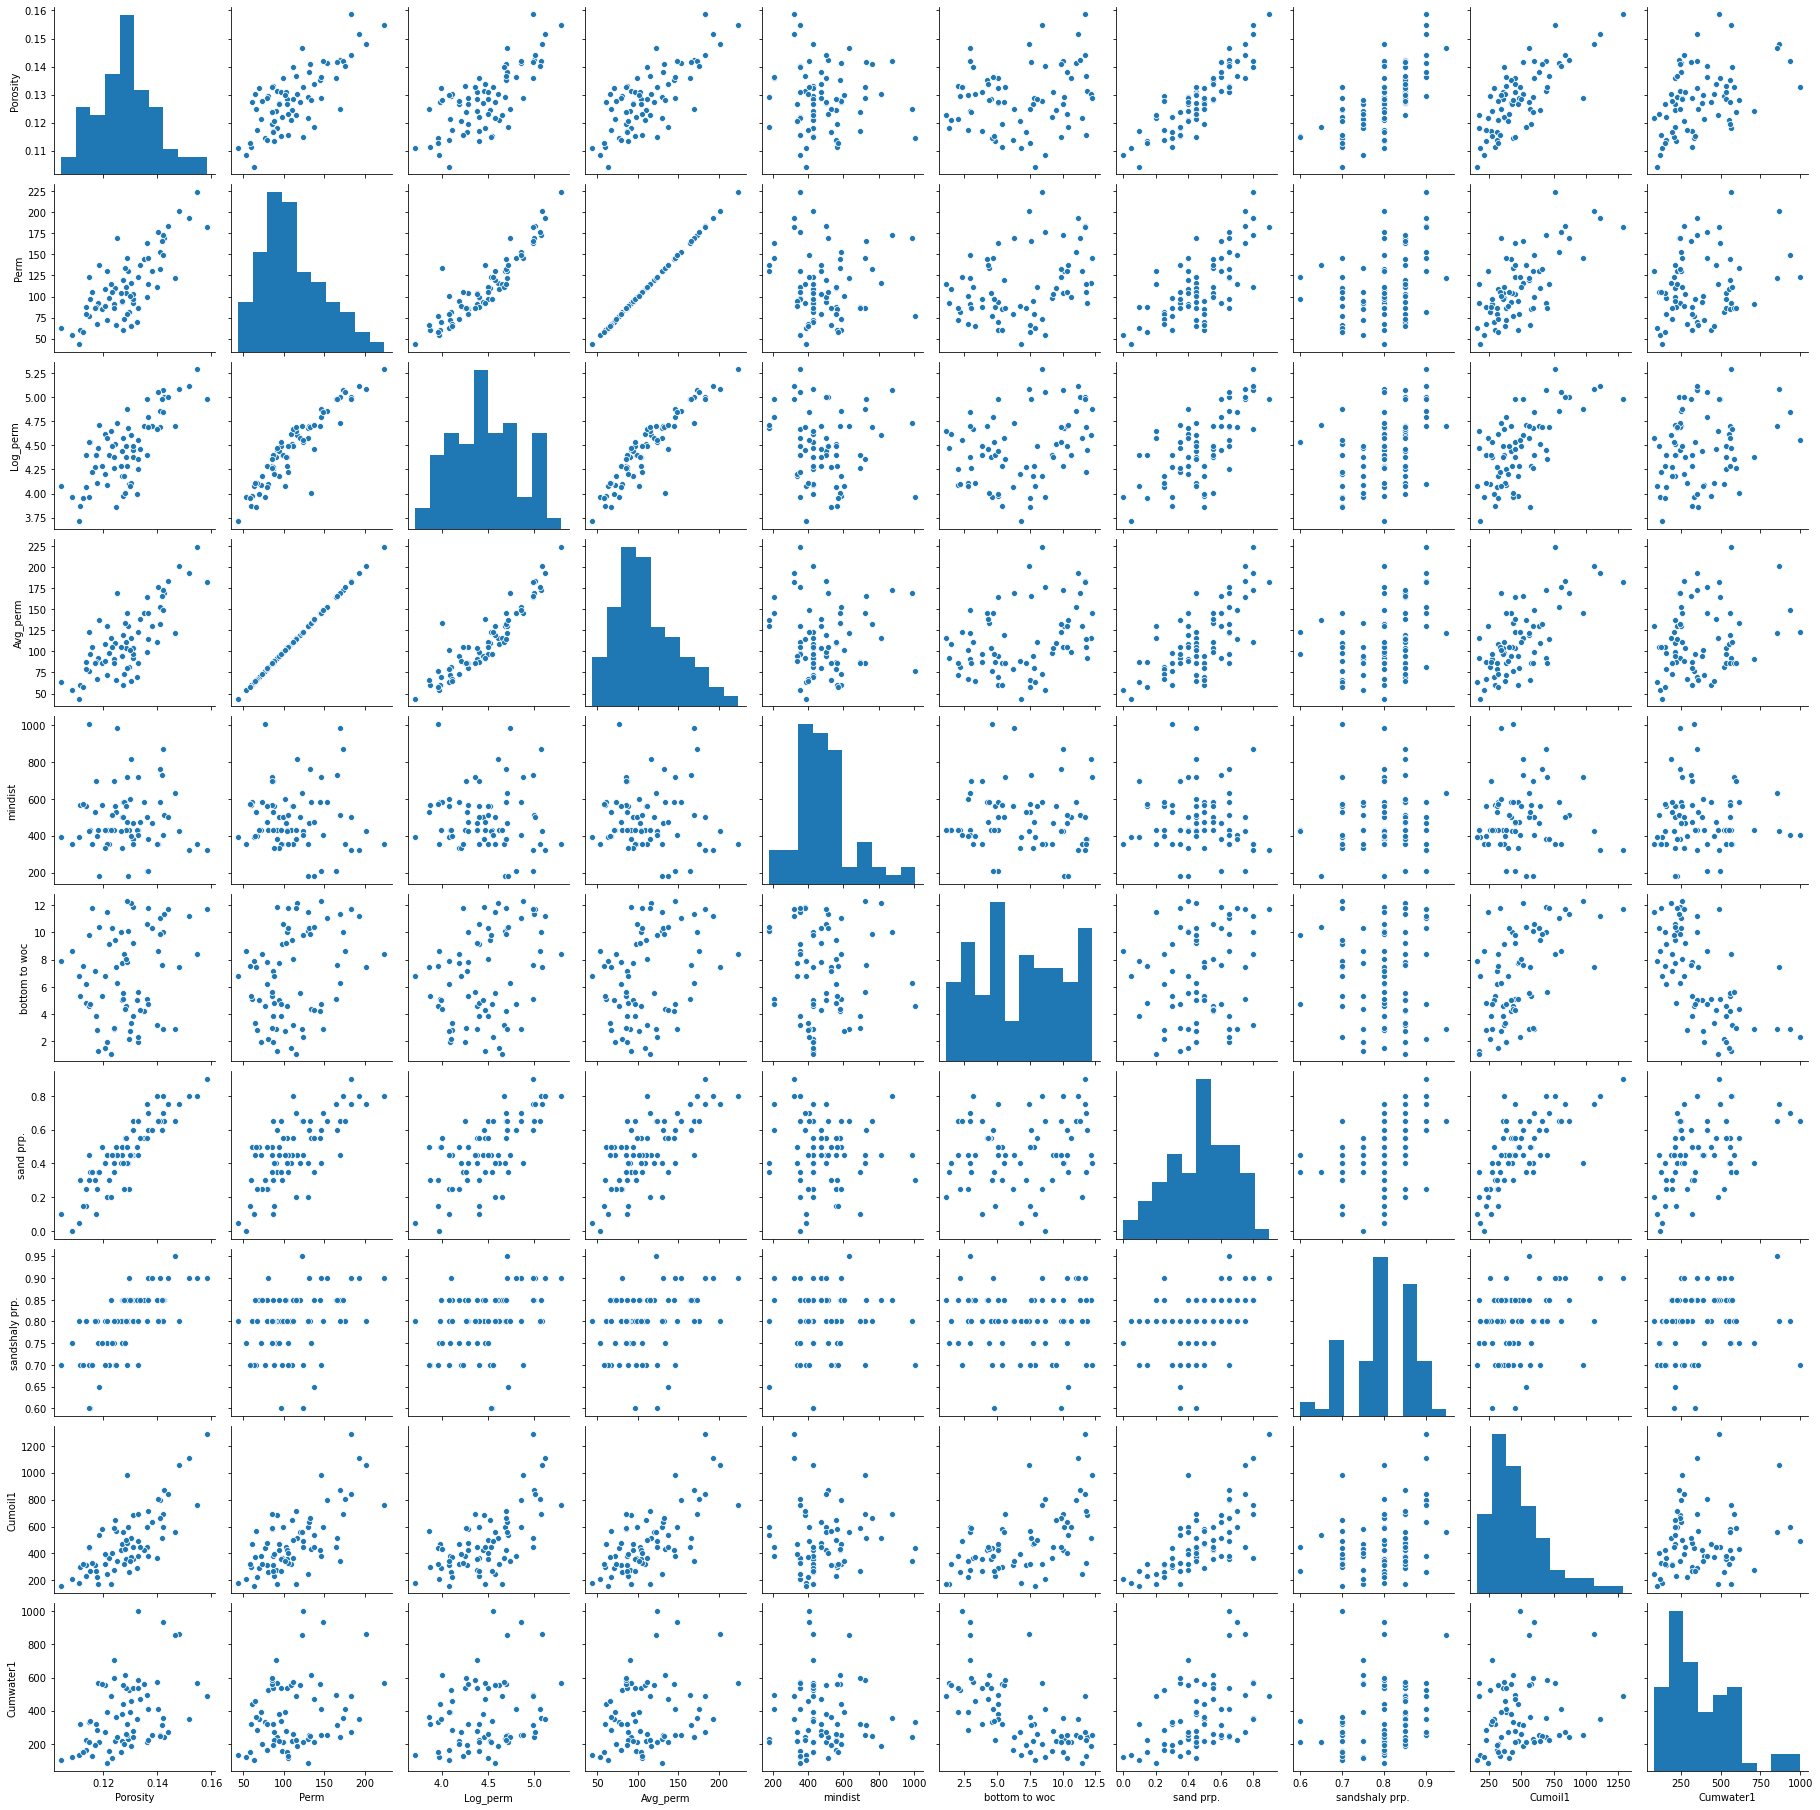

In [364]:
sns.pairplot(df_merged, vars=['Porosity','Perm', 'Log_perm', 'Avg_perm', 'mindist', 'bottom to woc', 'sand prp.', 'sandshaly prp.','Cumoil1',  'Cumwater1'] )

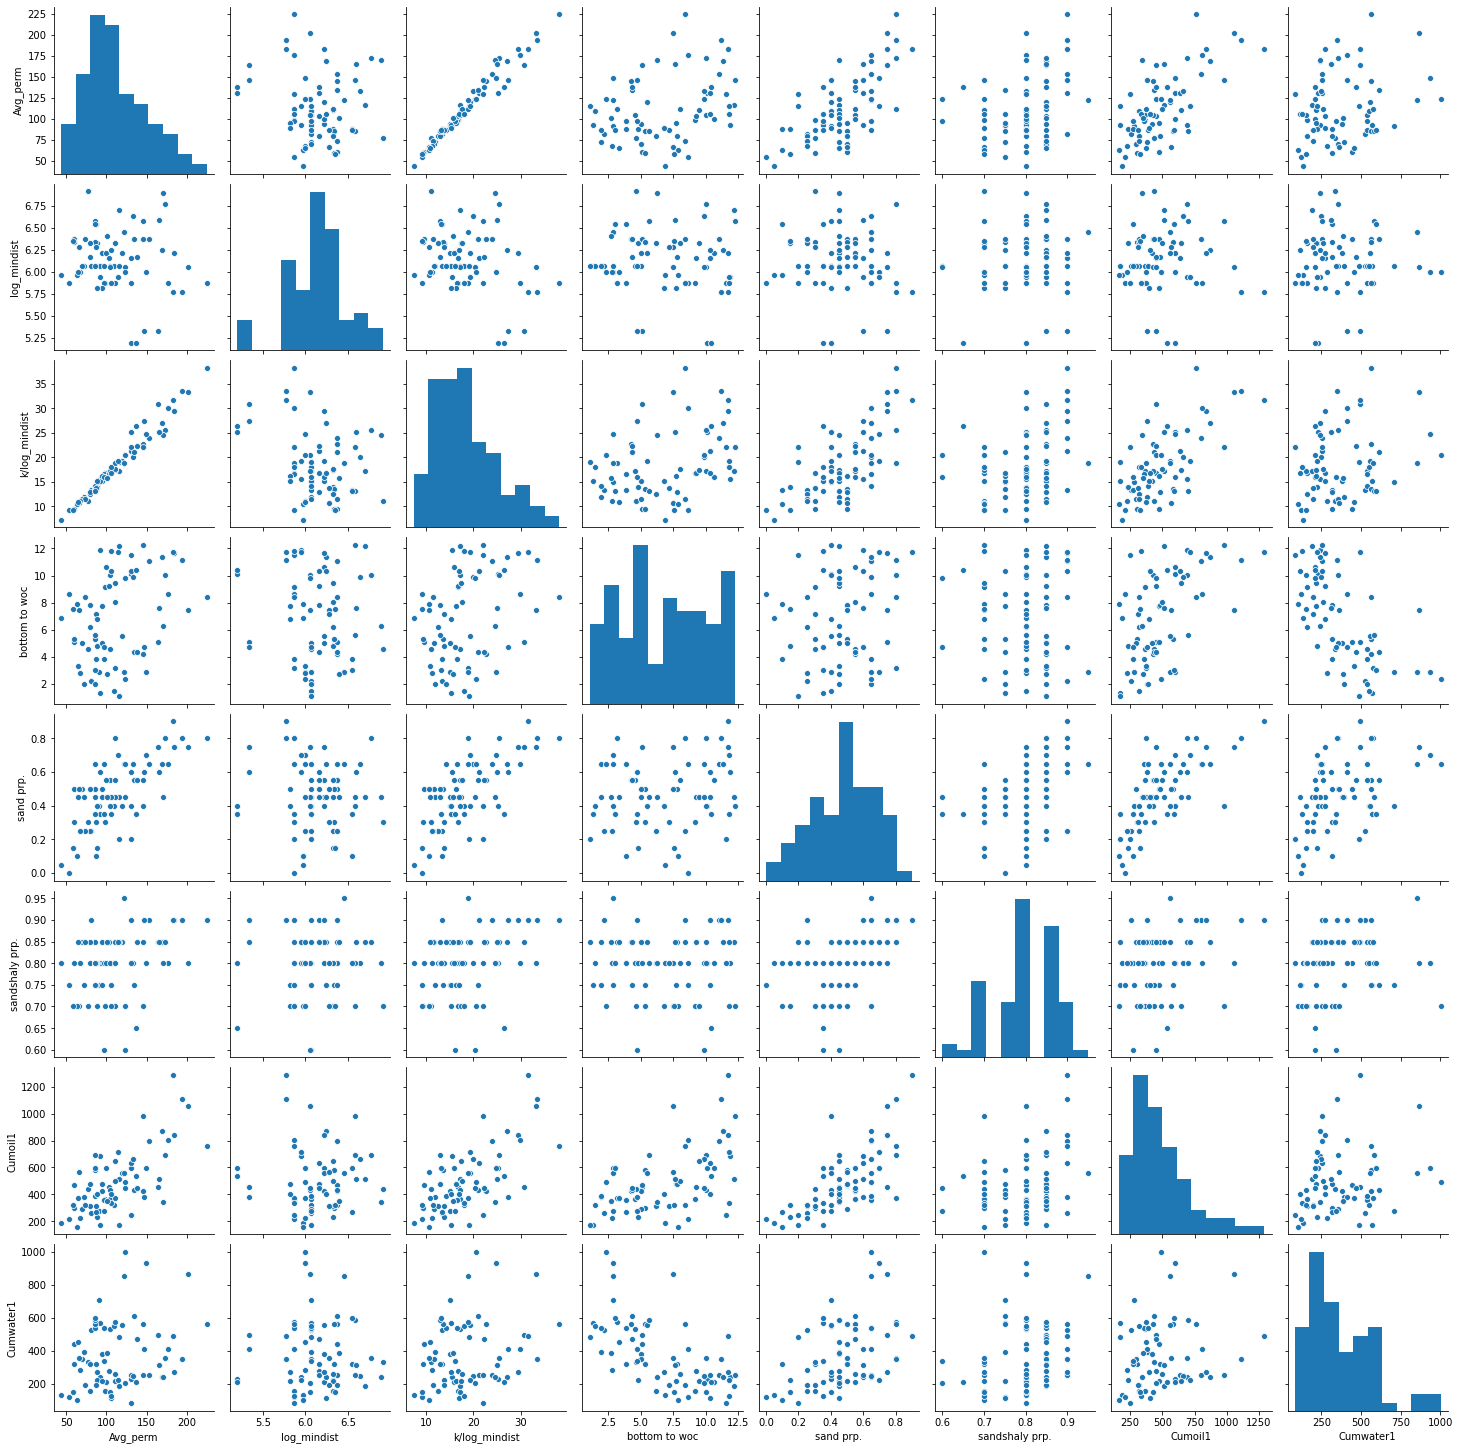

In [365]:
sns.pairplot(df_merged, vars=[ 'Avg_perm', 'log_mindist', 'k/log_mindist','bottom to woc', 'sand prp.', 'sandshaly prp.','Cumoil1',  'Cumwater1'])

In [ ]:
sns.pairplot(df_merged, vars=[ 'Porosity', 'Avg_perm', 'log_mindist', 'bottom to woc', 'Cumoil1',  'Cumwater1', 'oil12', 'water12'])

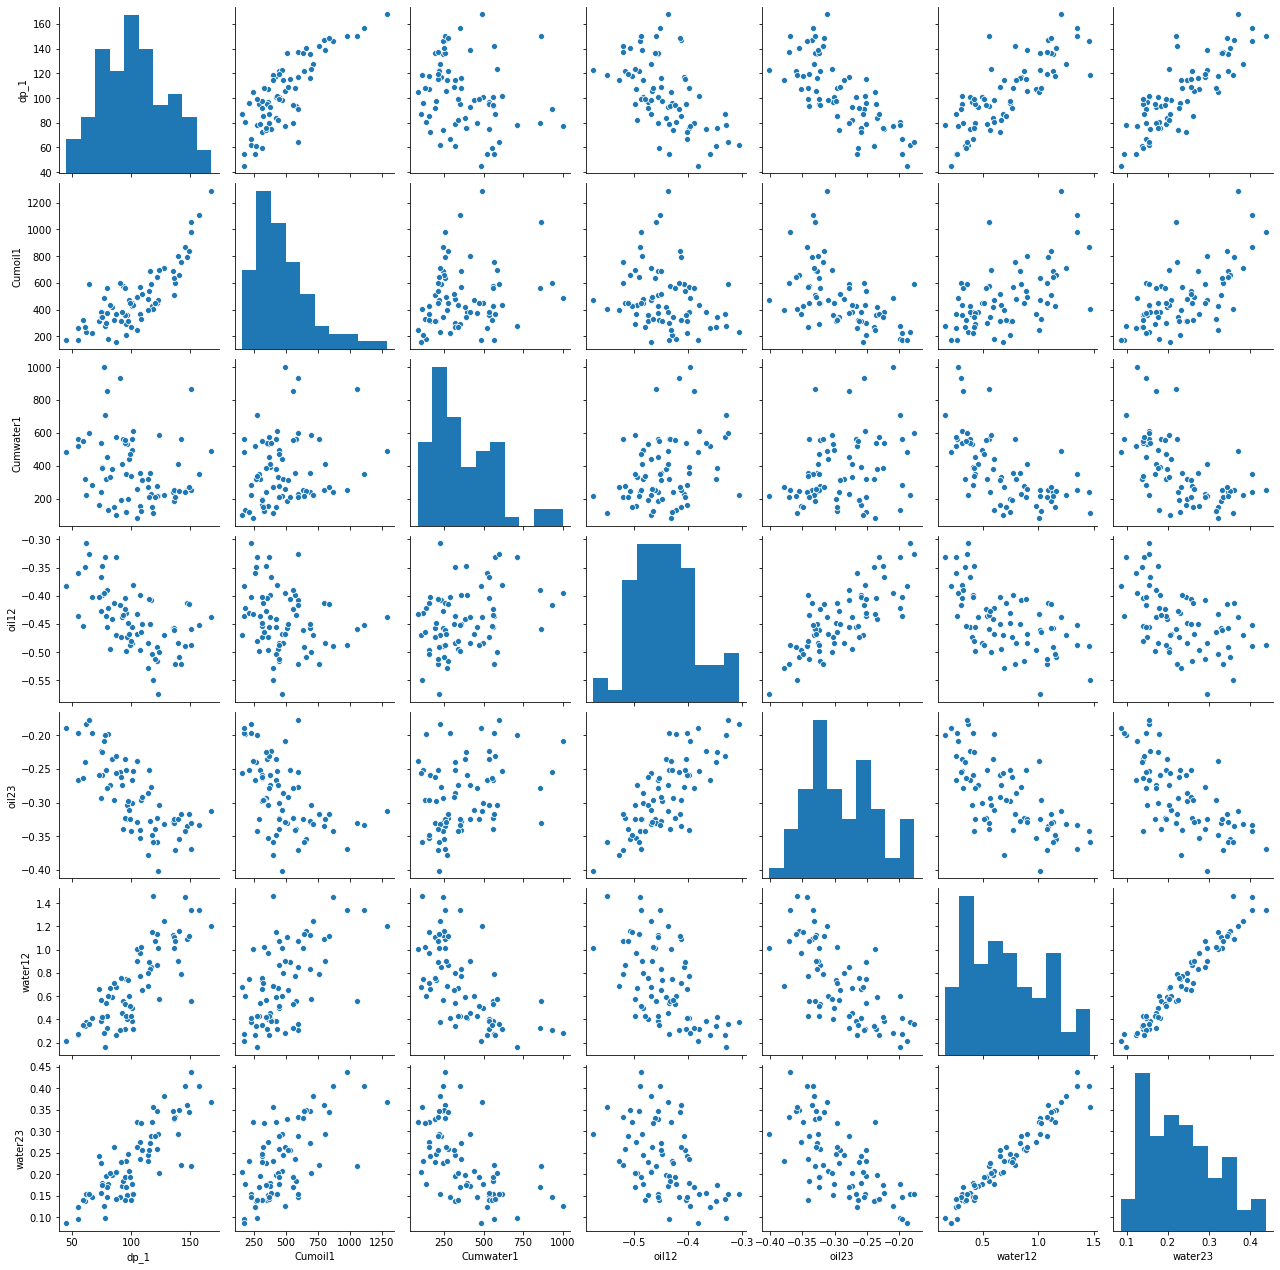

In [367]:
sns.pairplot(df_merged, vars=[ 'dp_1', 'Cumoil1',  'Cumwater1', 'oil12', 'oil23', 'water12', 'water23'])

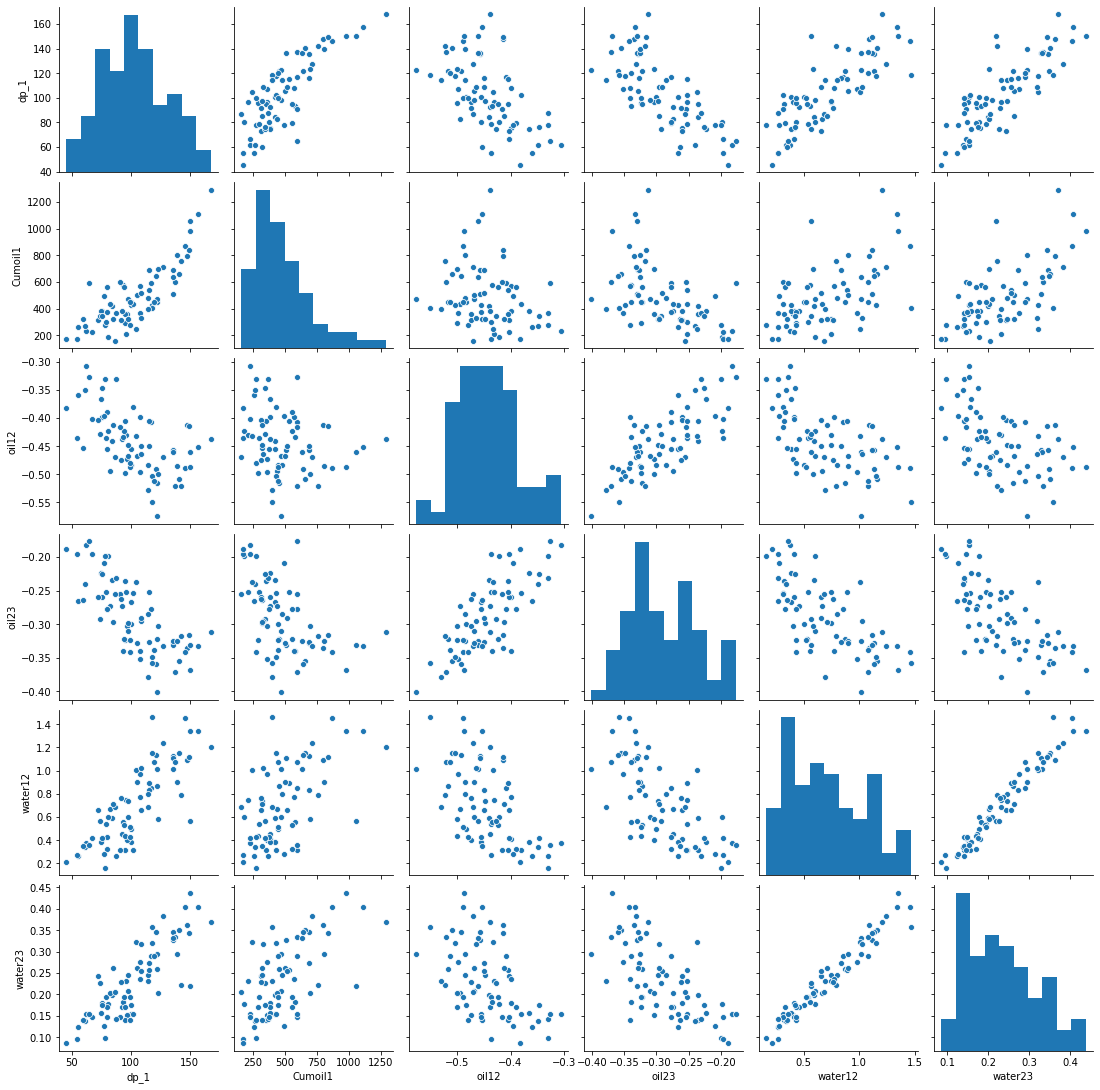

In [368]:
sns.pairplot(df_merged[['dp_1', 'Cumoil1', 'oil12',  'oil23', 'water12', 'water23']])

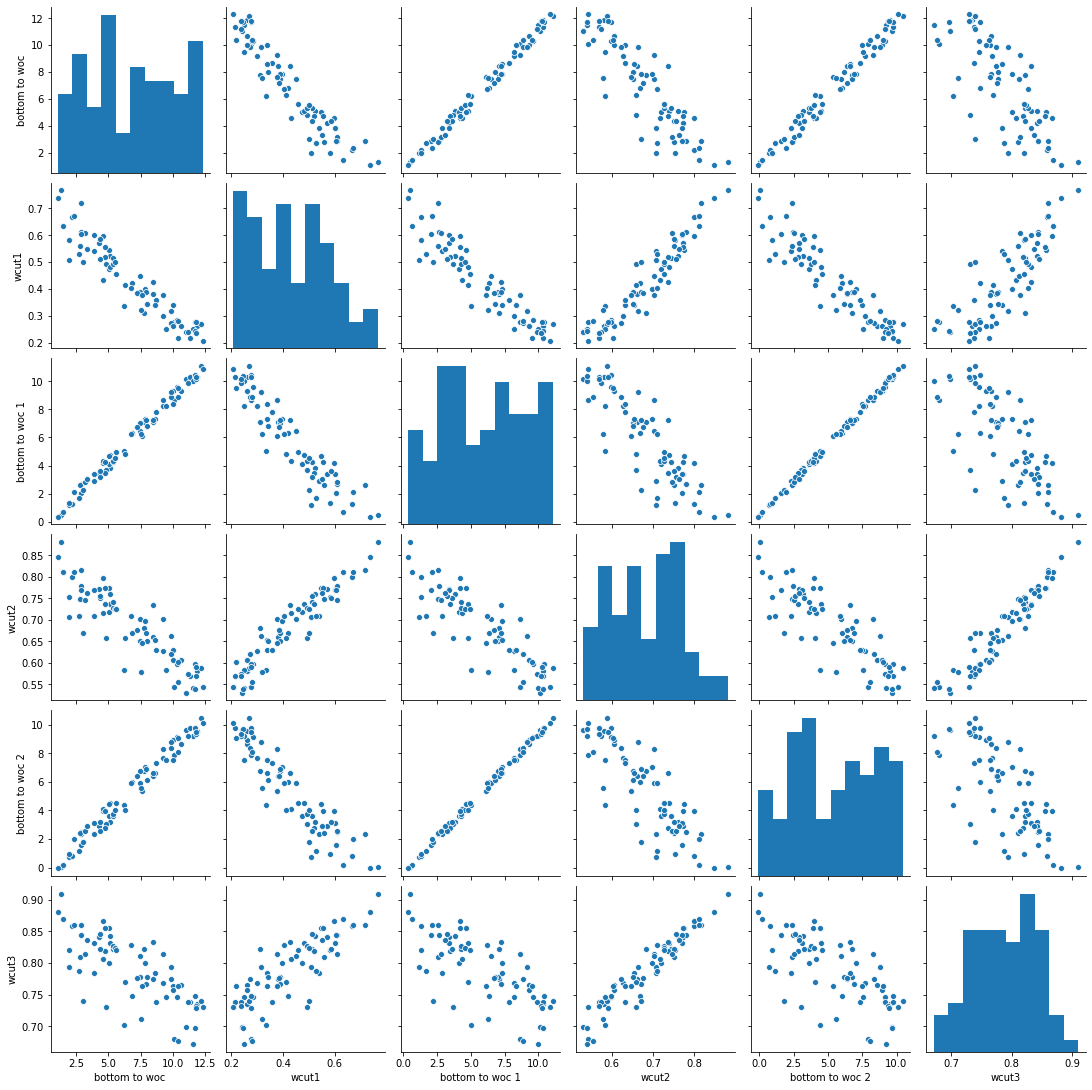

In [369]:
sns.pairplot(df_merged[['bottom to woc', 'wcut1', 'bottom to woc 1', 'wcut2', 'bottom to woc 2', 'wcut3']])

In [370]:
vars=['woc rise 1', 'bottom to woc', 'wcut1', 'bottom to woc 1', 'wcut2', 'bottom to woc 2', 'wcut3', 'water12', 'water23']
correlation = df_merged[vars].corr()
pd.options.display.float_format = "{:,.4f}".format
print(correlation)

                 woc rise 1  bottom to woc   wcut1  bottom to woc 1   wcut2  \
woc rise 1           1.0000         0.5621 -0.5450           0.4710 -0.6107   
bottom to woc        0.5621         1.0000 -0.9434           0.9943 -0.8847   
wcut1               -0.5450        -0.9434  1.0000          -0.9362  0.9481   
bottom to woc 1      0.4710         0.9943 -0.9362           1.0000 -0.8652   
wcut2               -0.6107        -0.8847  0.9481          -0.8652  1.0000   
bottom to woc 2      0.4212         0.9869 -0.9280           0.9985 -0.8508   
wcut3               -0.5855        -0.7511  0.8291          -0.7259  0.9537   
water12              0.4720         0.9331 -0.9416           0.9345 -0.8431   
water23              0.5474         0.9332 -0.9464           0.9249 -0.8847   

                 bottom to woc 2   wcut3  water12  water23  
woc rise 1                0.4212 -0.5855   0.4720   0.5474  
bottom to woc             0.9869 -0.7511   0.9331   0.9332  
wcut1                    -

               woc rise 1  wcutincrease1  woc rise 2  wcutincrease2
woc rise 1         1.0000         0.4787      1.0000         0.5787
wcutincrease1      0.4787         1.0000      0.4793         0.9537
woc rise 2         1.0000         0.4793      1.0000         0.5793
wcutincrease2      0.5787         0.9537      0.5793         1.0000


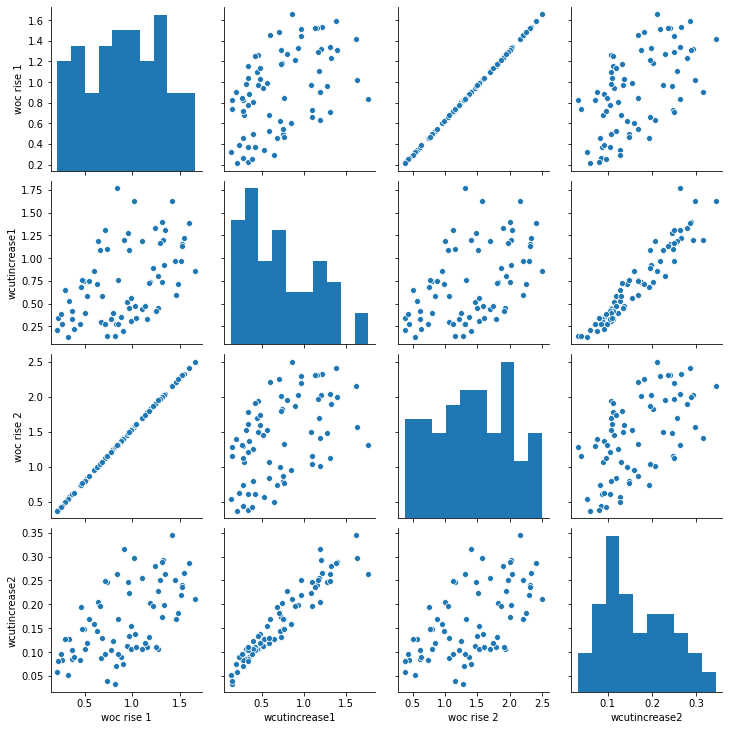

In [371]:
vars=['woc rise 1', 'wcutincrease1', 'woc rise 2', 'wcutincrease2']
sns.pairplot(df_merged[['woc rise 1', 'wcutincrease1', 'woc rise 2', 'wcutincrease2']])

correlation = df_merged[vars].corr()
pd.options.display.float_format = "{:,.4f}".format
print(correlation)

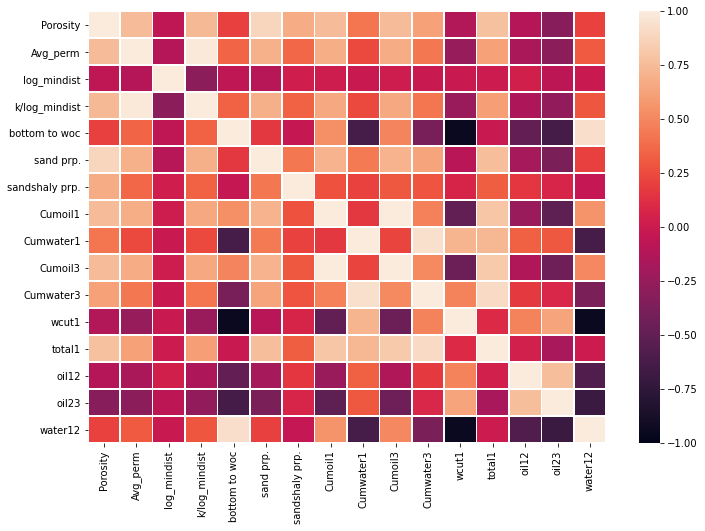

In [373]:
vars=['Porosity', 'Avg_perm', 'log_mindist', 'k/log_mindist', 'bottom to woc', 'sand prp.', 'sandshaly prp.','Cumoil1',  'Cumwater1', 'Cumoil3',  'Cumwater3', 'wcut1', 'total1', 'oil12', 'oil23', 'water12']
plt.subplot(111)                          # plot a color coded correlation matrix
sns.heatmap(df_merged[vars].corr(),vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

In [374]:
correlation = df_merged[vars].corr()
pd.options.display.float_format = "{:,.4f}".format
print(correlation)

                Porosity  Avg_perm  log_mindist  k/log_mindist  bottom to woc  \
Porosity          1.0000    0.7543      -0.0574         0.7367         0.2104   
Avg_perm          0.7543    1.0000      -0.1115         0.9821         0.3469   
log_mindist      -0.0574   -0.1115       1.0000        -0.2894        -0.0579   
k/log_mindist     0.7367    0.9821      -0.2894         1.0000         0.3411   
bottom to woc     0.2104    0.3469      -0.0579         0.3411         1.0000   
sand prp.         0.8834    0.6970      -0.0961         0.6876         0.1688   
sandshaly prp.    0.6753    0.3613       0.0291         0.3426        -0.0281   
Cumoil1           0.7507    0.6844       0.0121         0.6637         0.5343   
Cumwater1         0.4227    0.2407      -0.0086         0.2373        -0.6283   
Cumoil3           0.7535    0.6792       0.0104         0.6597         0.4860   
Cumwater3         0.6250    0.4344      -0.0083         0.4262        -0.3872   
wcut1            -0.1191   -

In [375]:
vars=[ 'dp_1', 'Cumoil1',  'Cumwater1', 'oil12', 'oil12', 'wcut1', 'water12']
correlation = df_merged[vars].corr()
pd.options.display.float_format = "{:,.4f}".format
print(correlation)

             dp_1  Cumoil1  Cumwater1   oil12   oil12   wcut1  water12
dp_1       1.0000   0.8109    -0.2268 -0.5559 -0.5559 -0.7531   0.8056
Cumoil1    0.8109   1.0000     0.1705 -0.2324 -0.2324 -0.4949   0.5611
Cumwater1 -0.2268   0.1705     1.0000  0.3322  0.3322  0.7145  -0.6250
oil12     -0.5559  -0.2324     0.3322  1.0000  1.0000  0.4843  -0.5790
oil12     -0.5559  -0.2324     0.3322  1.0000  1.0000  0.4843  -0.5790
wcut1     -0.7531  -0.4949     0.7145  0.4843  0.4843  1.0000  -0.9416
water12    0.8056   0.5611    -0.6250 -0.5790 -0.5790 -0.9416   1.0000


In [376]:
vars=['dp_1', 'oil12',  'oil23', 'water12', 'water23', 'wcut2']
correlation = df_merged[vars].corr()
pd.options.display.float_format = "{:,.4f}".format
print(correlation)

           dp_1   oil12   oil23  water12  water23   wcut2
dp_1     1.0000 -0.5559 -0.7398   0.8056   0.8286 -0.6392
oil12   -0.5559  1.0000  0.7641  -0.5790  -0.4961  0.1979
oil23   -0.7398  0.7641  1.0000  -0.6900  -0.6840  0.4421
water12  0.8056 -0.5790 -0.6900   1.0000   0.9743 -0.8431
water23  0.8286 -0.4961 -0.6840   0.9743   1.0000 -0.8847
wcut2   -0.6392  0.1979  0.4421  -0.8431  -0.8847  1.0000


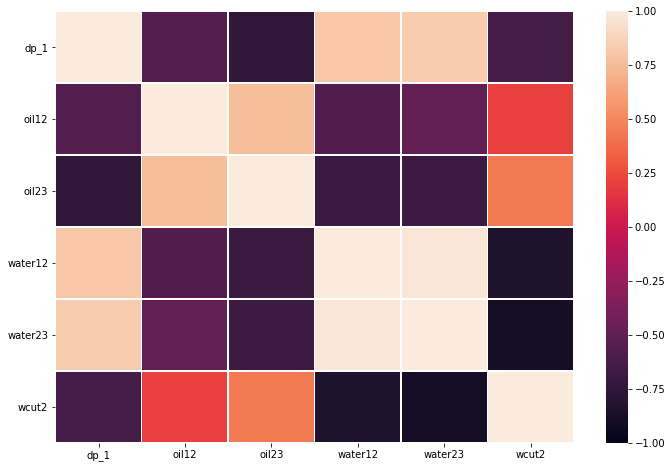

In [377]:
plt.subplot(111)                          # plot a color coded correlation matrix
sns.heatmap(df_merged[vars].corr(),vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()